# QGIS Plot Preparation 

## Import libraries

In [2]:
import pandas as pd
import numpy as np

from config_and_dependencies.config import * 

pd.set_option('display.max_rows', 500)

## Import class predictions

In [3]:
results_df = pd.read_csv('predictions.csv')

In [4]:
results_df.tail(5)

Unnamed: 0  class_number        FH        ER        WW        TC  \
427         427             2  0.026250  0.152917  0.278750  0.122500   
428         428             2  0.042083  0.091250  0.338750  0.073750   
429         429             3  0.006667  0.177083  0.059583  0.388333   
430         430            15  0.007500  0.121667  0.117083  0.145417   
431         431             3  0.007917  0.156250  0.060000  0.360000   

           CS        KQ        AR        SL  ...        PF        WH  \
427  0.017083  0.027083  0.060833  0.006667  ...  0.076667  0.025000   
428  0.014167  0.135000  0.036250  0.012917  ...  0.008333  0.017917   
429  0.038750  0.058750  0.011250  0.032917  ...  0.015417  0.033333   
430  0.014583  0.098750  0.009583  0.061667  ...  0.001667  0.043333   
431  0.027083  0.045000  0.018750  0.079583  ...  0.003333  0.016250   

           SQ        WN        BH        PH        LB     Analysis  \
427  0.032500  0.017083  0.000833  0.091667  0.024583   098_WF_9_2   
428  0.067917  0.011667  0.000000  0.067083  0.002917   099_WF_9_3   
429  0.011250  0.002917  0.001667  0.102917  0.029167  100_WF_10_1   
430  0.061250  0.021250  0.001667  0.160000  0.045417  101_WF_10_2   
431  0.015000  0.005000  0.003750  0.157500  0.026250  102_WF_10_3   

     inlierLabel class_predictions  
427           -1             other  
428           -1             other  
429            1                TC  
430            1                PH  
431            1                TC  

[5 rows x 22 columns]

## Import Raw Data to get site and nodule details

In [5]:
my_data = pd.read_csv(data_input_path)

In [6]:
my_data.head()

Analysis  Geology  Province Region Site SubSite Formation Band   Nodule  \
0  10_FH1_1_1  Bedrock  Northern    NaN   FH     FH1   Burnham  FH1  FH1_1_1   
1  11_FH1_1_1  Bedrock  Northern    NaN   FH     FH1   Burnham  FH1  FH1_1_1   
2  12_FH1_1_1  Bedrock  Northern    NaN   FH     FH1   Burnham  FH1  FH1_1_1   
3  13_FH1_1_2  Bedrock  Northern    NaN   FH     FH1   Burnham  FH1  FH1_1_2   
4  14_FH1_1_2  Bedrock  Northern    NaN   FH     FH1   Burnham  FH1  FH1_1_2   

     Li7  ... Ho165 Er166 Tm169 Yb172  Lu175 Hf178  Ta181 Pb208 Th232  U238  
0  15.63  ...  0.03  0.06  0.01  0.02      0  0.04   0.01  0.24  0.07  0.05  
1   11.5  ...  0.03  0.06  0.01  0.04   0.01  0.05      0  0.07  0.08  0.04  
2  20.05  ...  0.02  0.07  0.01  0.06      0  0.02   0.01  0.46  0.05  0.05  
3  11.16  ...  0.03  0.05     0  0.03  <0.00  0.08  <0.00  0.64  0.05  0.03  
4  17.71  ...  0.03  0.05  0.01  0.05   0.01  0.02   0.01  0.59  0.06  0.09  

[5 rows x 62 columns]

In [7]:
#my_data.info()

# Isolate superficial sample rows and convert cells to strings

In [8]:
superficial_data = my_data[my_data['Geology'] == 'Superficial']#.astype(str)

In [9]:
superficial_data.head()

Analysis      Geology Province Region Site SubSite Formation Band Nodule  \
808  005_AB_1  Superficial      NaN     AB   AB      AB       NaN   AB   AB_1   
809  006_AB_1  Superficial      NaN     AB   AB      AB       NaN   AB   AB_1   
810  007_AB_1  Superficial      NaN     AB   AB      AB       NaN   AB   AB_1   
811  008_AB_2  Superficial      NaN     AB   AB      AB       NaN   AB   AB_2   
812  009_AB_2  Superficial      NaN     AB   AB      AB       NaN   AB   AB_2   

       Li7  ... Ho165 Er166 Tm169 Yb172 Lu175  Hf178 Ta181 Pb208 Th232  U238  
808  19.35  ...     0  0.01     0  0.01     0   0.01     0  0.56  0.05  0.21  
809   2.61  ...     0  0.02     0  0.02     0      0     0  0.24  0.06  0.51  
810   2.29  ...  0.01  0.02     0     0     0   0.02  0.01  0.48  0.05  0.63  
811   6.86  ...  0.02  0.07  0.01  0.04     0  <0.00  0.01  3.11  0.06  0.03  
812   8.45  ...  0.01  0.05     0  0.04     0   0.01     0  3.04  0.06  0.06  

[5 rows x 62 columns]

In [10]:
#print(superficial_data['Analysis'].unique())

## Add Site column - not needed?

In [11]:
concatenated_df = pd.concat([results_df, superficial_data[['Site']]], axis=1) 

In [12]:
concatenated_df.head()

Unnamed: 0  class_number        FH        ER        WW        TC        CS  \
0         0.0           9.0  0.015417  0.012917  0.050833  0.000833  0.003750   
1         1.0           9.0  0.020000  0.020417  0.022500  0.037917  0.012917   
2         2.0           9.0  0.031250  0.021667  0.029583  0.044167  0.002083   
3         3.0           2.0  0.059167  0.051250  0.252083  0.027083  0.005000   
4         4.0           2.0  0.063333  0.060833  0.266250  0.014167  0.003333   

         KQ        AR        SL  ...        WH        SQ        WN        BH  \
0  0.093333  0.001667  0.111250  ...  0.068333  0.022083  0.028333  0.030417   
1  0.057083  0.000000  0.065000  ...  0.032500  0.011250  0.004167  0.052083   
2  0.040417  0.000000  0.025833  ...  0.063333  0.021250  0.012917  0.007500   
3  0.076250  0.000417  0.065000  ...  0.029167  0.015000  0.032917  0.000417   
4  0.095417  0.002500  0.037083  ...  0.037917  0.012917  0.042083  0.001667   

         PH        LB  Analysis  inlierLabel  class_predictions Site  
0  0.178333  0.006667  005_AB_1         -1.0              other  NaN  
1  0.191667  0.013750  006_AB_1         -1.0              other  NaN  
2  0.236250  0.006667  007_AB_1          1.0                 WB  NaN  
3  0.092083  0.006667  008_AB_2         -1.0              other  NaN  
4  0.087500  0.006250  009_AB_2          1.0                 WW  NaN  

[5 rows x 23 columns]

In [13]:
concatenated_df = concatenated_df[['Analysis'] + [col for col in concatenated_df.columns if col != 'Analysis']]

In [14]:
concatenated_df.head(5)

Analysis  Unnamed: 0  class_number        FH        ER        WW        TC  \
0  005_AB_1         0.0           9.0  0.015417  0.012917  0.050833  0.000833   
1  006_AB_1         1.0           9.0  0.020000  0.020417  0.022500  0.037917   
2  007_AB_1         2.0           9.0  0.031250  0.021667  0.029583  0.044167   
3  008_AB_2         3.0           2.0  0.059167  0.051250  0.252083  0.027083   
4  009_AB_2         4.0           2.0  0.063333  0.060833  0.266250  0.014167   

         CS        KQ        AR  ...        PF        WH        SQ        WN  \
0  0.003750  0.093333  0.001667  ...  0.000833  0.068333  0.022083  0.028333   
1  0.012917  0.057083  0.000000  ...  0.000000  0.032500  0.011250  0.004167   
2  0.002083  0.040417  0.000000  ...  0.000000  0.063333  0.021250  0.012917   
3  0.005000  0.076250  0.000417  ...  0.000417  0.029167  0.015000  0.032917   
4  0.003333  0.095417  0.002500  ...  0.001250  0.037917  0.012917  0.042083   

         BH        PH        LB  inlierLabel  class_predictions  Site  
0  0.030417  0.178333  0.006667         -1.0              other   NaN  
1  0.052083  0.191667  0.013750         -1.0              other   NaN  
2  0.007500  0.236250  0.006667          1.0                 WB   NaN  
3  0.000417  0.092083  0.006667         -1.0              other   NaN  
4  0.001667  0.087500  0.006250          1.0                 WW   NaN  

[5 rows x 23 columns]

In [15]:
#concatenated_df.info()

In [16]:
superficial_data.head()

Analysis      Geology Province Region Site SubSite Formation Band Nodule  \
808  005_AB_1  Superficial      NaN     AB   AB      AB       NaN   AB   AB_1   
809  006_AB_1  Superficial      NaN     AB   AB      AB       NaN   AB   AB_1   
810  007_AB_1  Superficial      NaN     AB   AB      AB       NaN   AB   AB_1   
811  008_AB_2  Superficial      NaN     AB   AB      AB       NaN   AB   AB_2   
812  009_AB_2  Superficial      NaN     AB   AB      AB       NaN   AB   AB_2   

       Li7  ... Ho165 Er166 Tm169 Yb172 Lu175  Hf178 Ta181 Pb208 Th232  U238  
808  19.35  ...     0  0.01     0  0.01     0   0.01     0  0.56  0.05  0.21  
809   2.61  ...     0  0.02     0  0.02     0      0     0  0.24  0.06  0.51  
810   2.29  ...  0.01  0.02     0     0     0   0.02  0.01  0.48  0.05  0.63  
811   6.86  ...  0.02  0.07  0.01  0.04     0  <0.00  0.01  3.11  0.06  0.03  
812   8.45  ...  0.01  0.05     0  0.04     0   0.01     0  3.04  0.06  0.06  

[5 rows x 62 columns]

In [17]:
mask = my_data['Geology'] == 'Superficial'

In [18]:
nodule_data = my_data[mask]['Nodule'].reset_index(drop=True)

In [19]:
nodule_data.head()

0    AB_1
1    AB_1
2    AB_1
3    AB_2
4    AB_2
Name: Nodule, dtype: object

In [20]:
concatenated_df = pd.concat([nodule_data, concatenated_df], axis=1)

In [21]:
#concatenated_df.head()

In [22]:
#concatenated_df.info()

In [23]:
grouped = concatenated_df.groupby('Nodule')

In [24]:
#grouped.head(140)

In [25]:
#print(concatenated_df.columns)

In [26]:
#grouped.groups.keys()

# Assuming you have 'concatenated_df' with the data

# Group the rows by 'Nodule' and calculate the median for columns 'FH' to 'LB' within each group
median_columns = ['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']
grouped = concatenated_df.groupby('Nodule')[median_columns].median().reset_index()

# Find the column with the highest median value for each 'Nodule' group
grouped['class_prediction'] = concatenated_df.groupby('Nodule')[median_columns].median().idxmax(axis=1).values

# Rename the median value columns to match 'FH' to 'LB'
grouped.columns = ['Nodule'] + [f'{col}' for col in median_columns] + ['class_prediction']

# Now 'grouped' contains the 'Nodule' name, median results for 'FH' to 'LB', and updated 'class_prediction'


In [27]:
# Numeric columns for which you want to calculate the median
median_columns = ['FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR', 'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB']

# Group the rows by 'Nodule' and calculate the median for numeric columns and mean for 'InlierLabel'
grouped = concatenated_df.groupby('Nodule').agg({
    **{col: 'median' for col in median_columns},
    'inlierLabel': 'mean'
}).reset_index()

# Find the column with the highest median value for each 'Nodule' group
grouped['class_prediction'] = grouped[median_columns].idxmax(axis=1).values

# Rename the median value columns to match 'FH' to 'LB'
grouped.columns = ['Nodule'] + [f'{col}' for col in median_columns] + ['inlierLabel', 'class_prediction']

# Now 'grouped' contains the 'Nodule' name, median results for 'FH' to 'LB', 'InlierLabel', and updated 'class_prediction'


In [28]:
grouped.head(5)

Nodule        FH        ER        WW        TC        CS        KQ  \
0   AB_1  0.020000  0.020417  0.029583  0.037917  0.003750  0.057083   
1   AB_2  0.059167  0.060417  0.252083  0.014167  0.003333  0.095417   
2   AB_3  0.024583  0.018750  0.112917  0.002917  0.005417  0.017083   
3   AB_4  0.052917  0.048333  0.059167  0.040833  0.017083  0.074167   
4   AB_5  0.047500  0.099583  0.140417  0.020000  0.014167  0.084583   

         AR        SL        FG        WB        PF        WH        SQ  \
0  0.000000  0.065000  0.025417  0.431667  0.000000  0.063333  0.021250   
1  0.002500  0.037083  0.128750  0.154167  0.001250  0.029167  0.015000   
2  0.001250  0.094583  0.059167  0.137917  0.003333  0.051667  0.031250   
3  0.005417  0.067083  0.092917  0.220417  0.000833  0.029583  0.021667   
4  0.001250  0.152500  0.092083  0.125000  0.006667  0.012083  0.007500   

         WN        BH        PH        LB  inlierLabel class_prediction  
0  0.012917  0.030417  0.191667  0.006667    -0.333333               WB  
1  0.032917  0.001667  0.092083  0.006667    -0.333333               WW  
2  0.097917  0.040417  0.232500  0.005417    -1.000000               PH  
3  0.007500  0.016250  0.252083  0.009583    -1.000000               PH  
4  0.006250  0.006667  0.068333  0.013750    -0.333333               SL

In [29]:
superficial_site_names = ['AB', 'LV', 'BR', 'KY', 'BF', 'ST', 'SH', 'CF', 'BG', 'AC', 'CR', 'GH', 'PX', 'WF']

In [30]:
# Define the list of superficial site names
superficial_site_names = ['AB', 'LV', 'BR', 'KY', 'BF', 'ST', 'SH', 'CF', 'BG', 'AC', 'CR', 'GH', 'PX', 'WF']

# Extract the first two letters from the 'Nodule' column and match them with the list
grouped['Superficial_Site'] = grouped['Nodule'].str.extract(r'^(\w{2})')[0]

# Check if the matched value is in the superficial site names list
grouped['Superficial_Site'] = grouped['Superficial_Site'].apply(lambda x: x if x in superficial_site_names else None)

# Fill missing values in the 'Superficial_Site' column with the corresponding 'Nodule' value
grouped['Superficial_Site'].fillna(grouped['Nodule'], inplace=True)

# Reorder the columns to have 'Superficial_Site' at the front
grouped = grouped[['Superficial_Site'] + [col for col in grouped.columns if col != 'Superficial_Site']]


In [31]:
grouped.head(5)

Superficial_Site Nodule        FH        ER        WW        TC        CS  \
0               AB   AB_1  0.020000  0.020417  0.029583  0.037917  0.003750   
1               AB   AB_2  0.059167  0.060417  0.252083  0.014167  0.003333   
2               AB   AB_3  0.024583  0.018750  0.112917  0.002917  0.005417   
3               AB   AB_4  0.052917  0.048333  0.059167  0.040833  0.017083   
4               AB   AB_5  0.047500  0.099583  0.140417  0.020000  0.014167   

         KQ        AR        SL  ...        WB        PF        WH        SQ  \
0  0.057083  0.000000  0.065000  ...  0.431667  0.000000  0.063333  0.021250   
1  0.095417  0.002500  0.037083  ...  0.154167  0.001250  0.029167  0.015000   
2  0.017083  0.001250  0.094583  ...  0.137917  0.003333  0.051667  0.031250   
3  0.074167  0.005417  0.067083  ...  0.220417  0.000833  0.029583  0.021667   
4  0.084583  0.001250  0.152500  ...  0.125000  0.006667  0.012083  0.007500   

         WN        BH        PH        LB  inlierLabel  class_prediction  
0  0.012917  0.030417  0.191667  0.006667    -0.333333                WB  
1  0.032917  0.001667  0.092083  0.006667    -0.333333                WW  
2  0.097917  0.040417  0.232500  0.005417    -1.000000                PH  
3  0.007500  0.016250  0.252083  0.009583    -1.000000                PH  
4  0.006250  0.006667  0.068333  0.013750    -0.333333                SL  

[5 rows x 21 columns]

In [32]:
# Load the data from superficial_sites.csv and bedrock_sites.csv
superficial_sites = pd.read_csv('geo input/superficial_sites.csv')
bedrock_sites = pd.read_csv('geo input/bedrock_sites.csv')

# Add a new column to distinguish between superficial and bedrock sites
superficial_sites['Site_Type'] = 'Superficial'
bedrock_sites['Site_Type'] = 'Bedrock'

# Concatenate the two DataFrames
combined_sites = pd.concat([superficial_sites, bedrock_sites], ignore_index=True)

# Rename the columns if needed
combined_sites = combined_sites.rename(columns={'Site_Type': 'Site_Type'})

# Keep only the desired columns
combined_sites = combined_sites[['Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y']]

# Now, combined_sites contains the combined data with columns 'Site', 'OS_BNG_X', and 'OS_BNG_Y'
print(combined_sites)

   Site    Site_Type     OS_BNG_X     OS_BNG_Y
0    AB  Superficial  188273.8392  234578.8663
1    LV  Superficial  332875.4441  220688.2877
2    BR  Superficial  330641.4792  158757.1809
3    KY  Superficial  367770.7648  168349.3224
4    BF  Superficial  389435.6101  162841.7344
5    ST  Superficial  359366.2742  198210.7622
6    SH  Superficial  383863.7099  224796.1005
7    CF  Superficial  383863.0736  229466.4813
8    BG  Superficial  386335.7010  234866.8890
9    AC  Superficial  394001.2521  234867.0684
10   CR  Superficial  399939.2905  243763.8308
11   GH  Superficial  404215.0890  245425.0400
12   PX  Superficial  420366.4360  237277.0263
13   WF  Superficial  421558.4823  235582.4429
14   FH      Bedrock  525449.5000  470820.2000
15   ER      Bedrock  491085.1000  445857.4000
16   WW      Bedrock  497047.0000  427955.0000
17   TC      Bedrock  625274.0000  340657.2000
18   CS      Bedrock  623884.5000  304744.8000
19   BC      Bedrock  578523.1000  285286.4000
20   KQ      

import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString


# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot background
mapping.plot(ax=ax, color='lightgrey')

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.any() and not bedrock_site_coords.any():
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

plt.title('Nodule Class Predictions')
plt.legend()
plt.show()



# DRAWING LINES

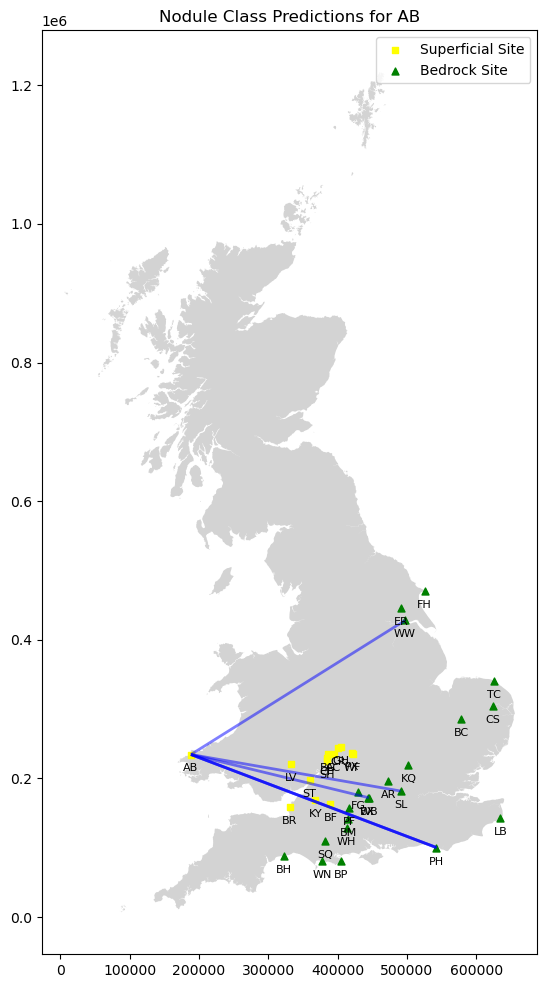

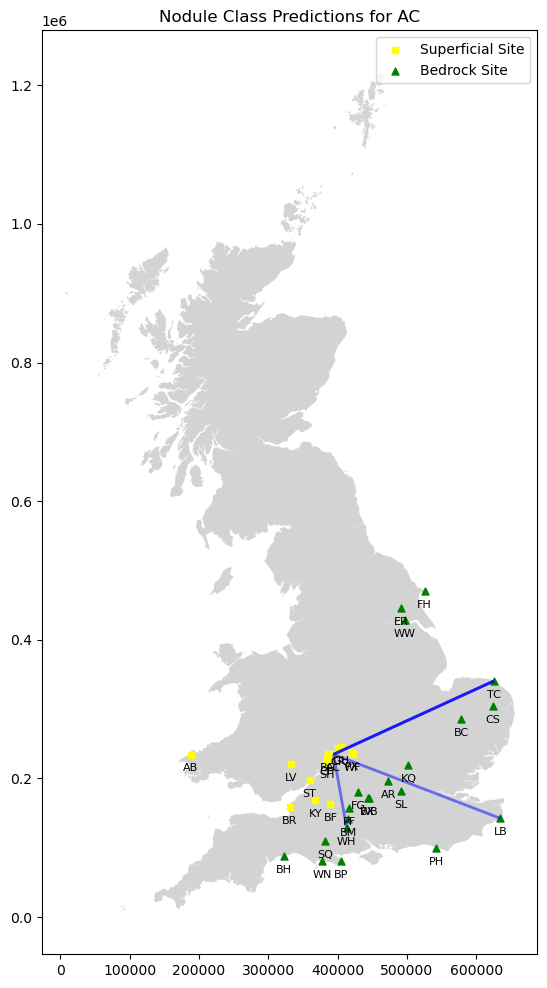

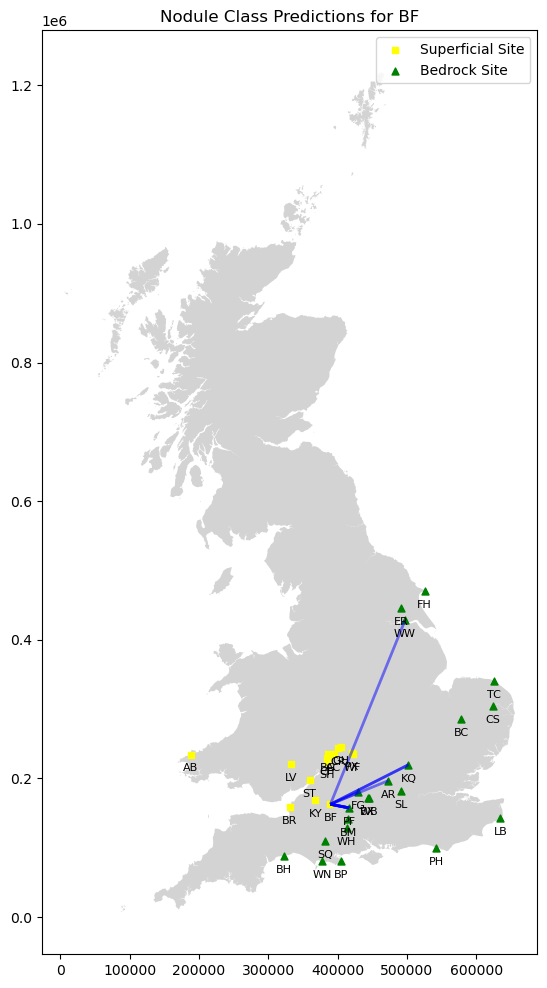

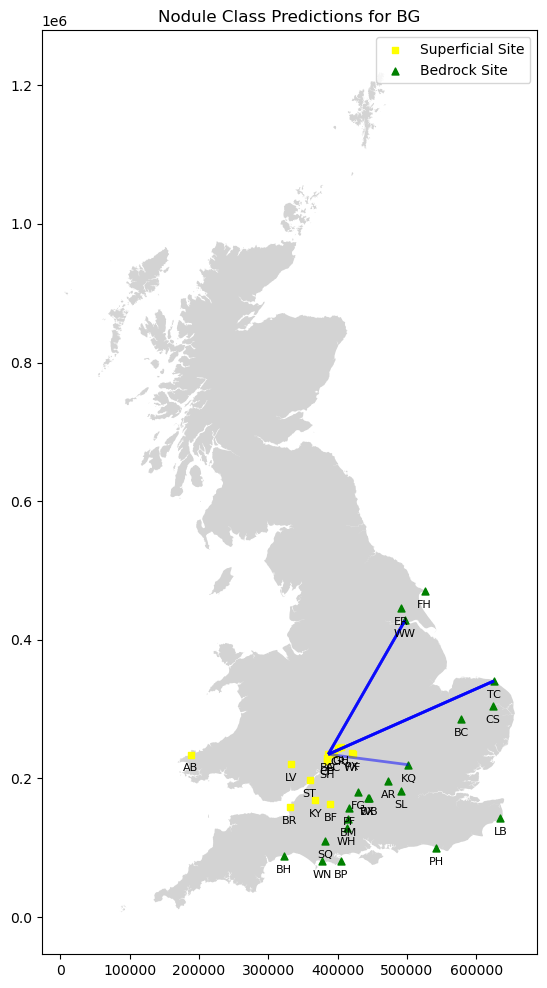

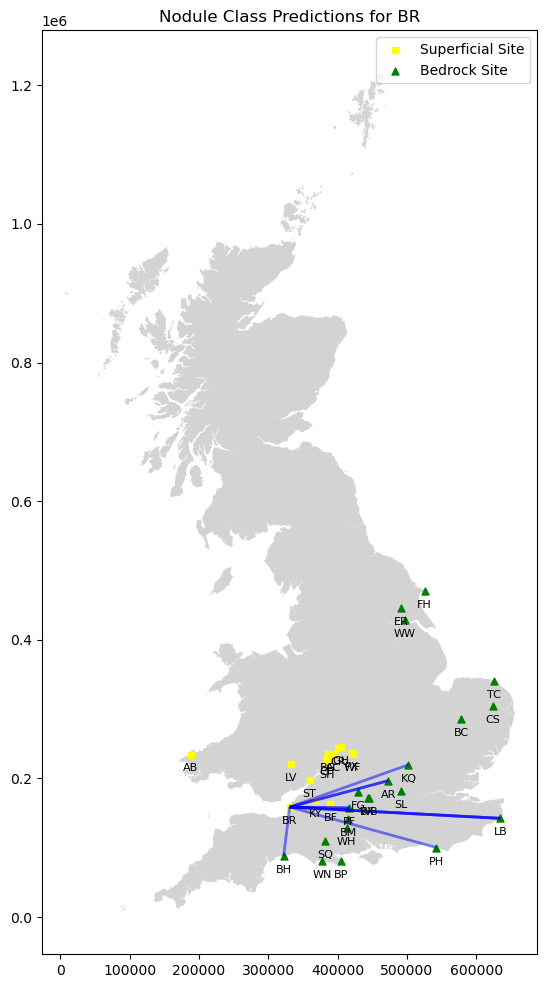

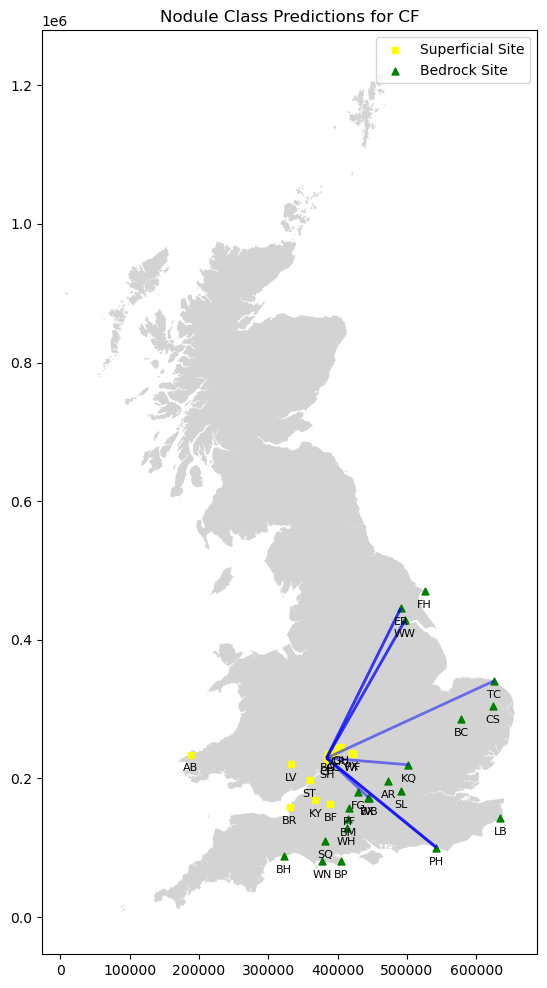

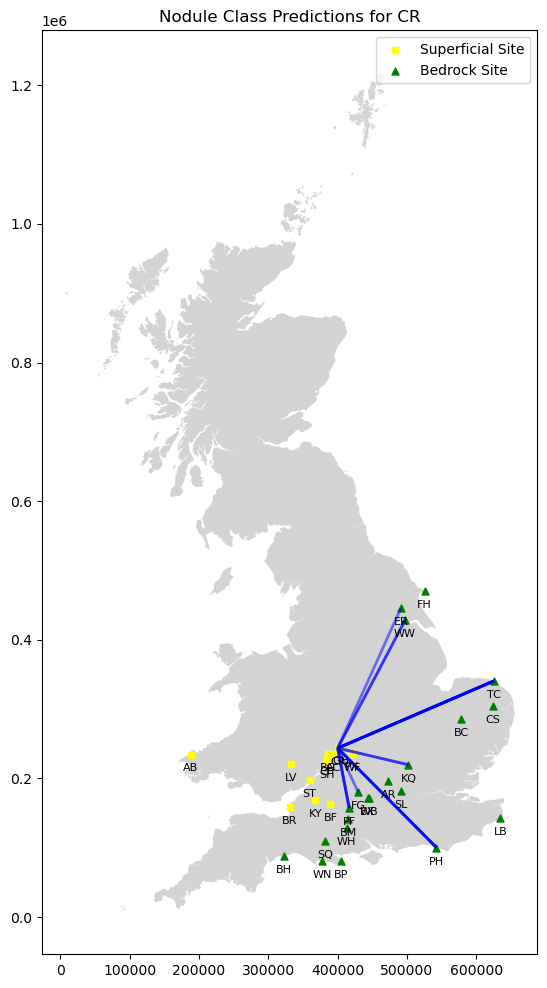

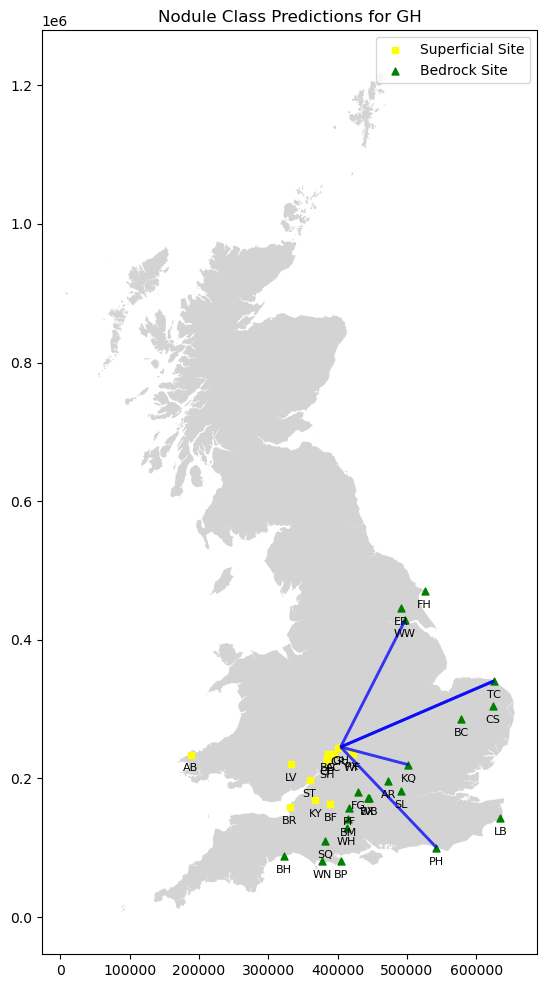

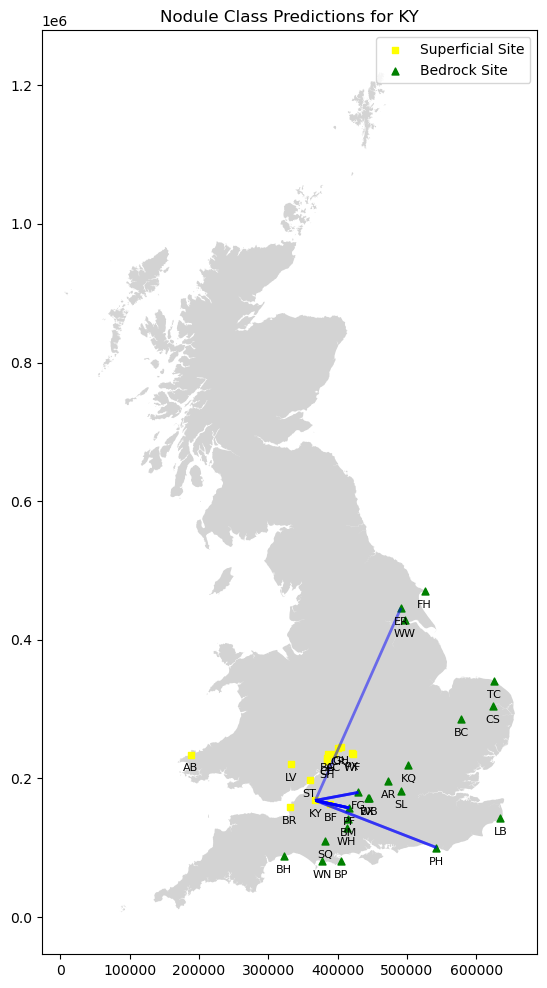

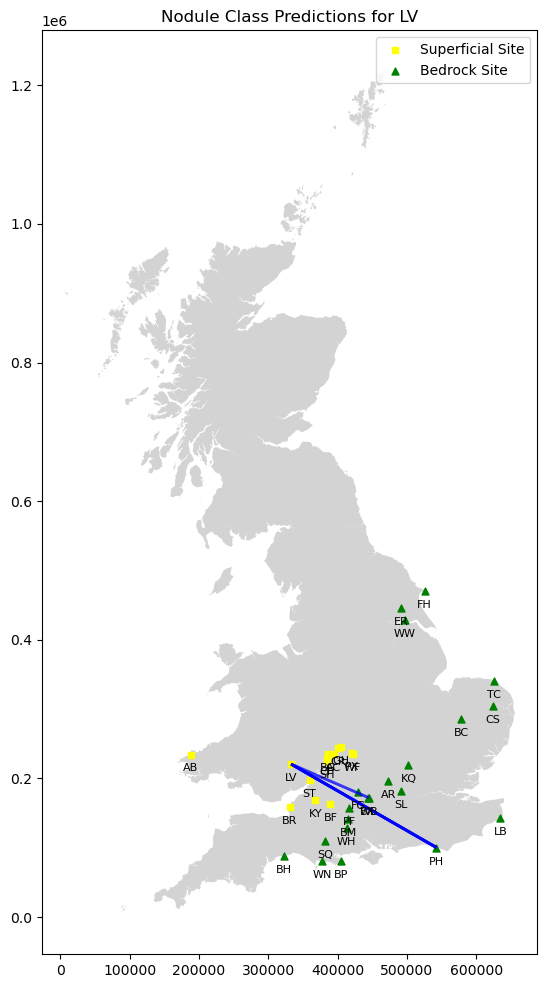

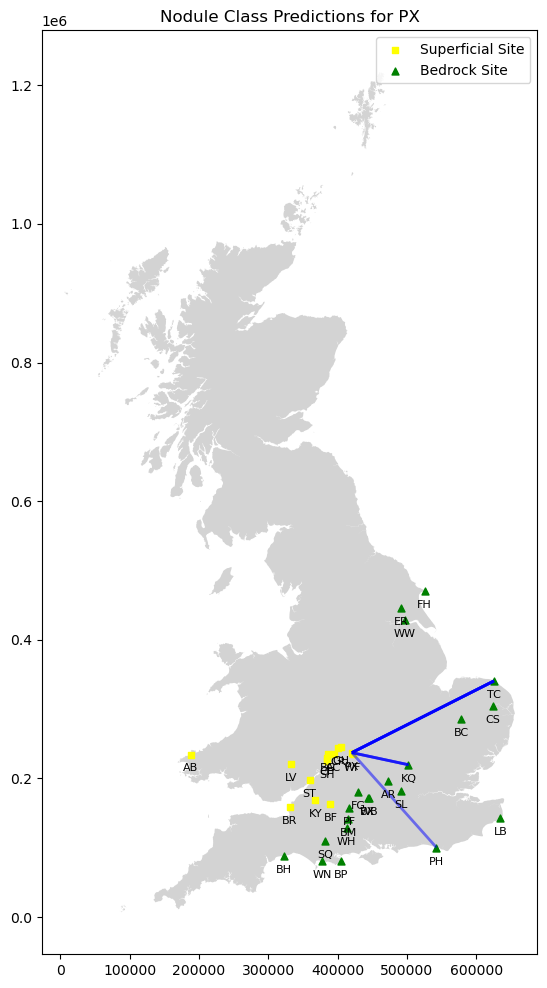

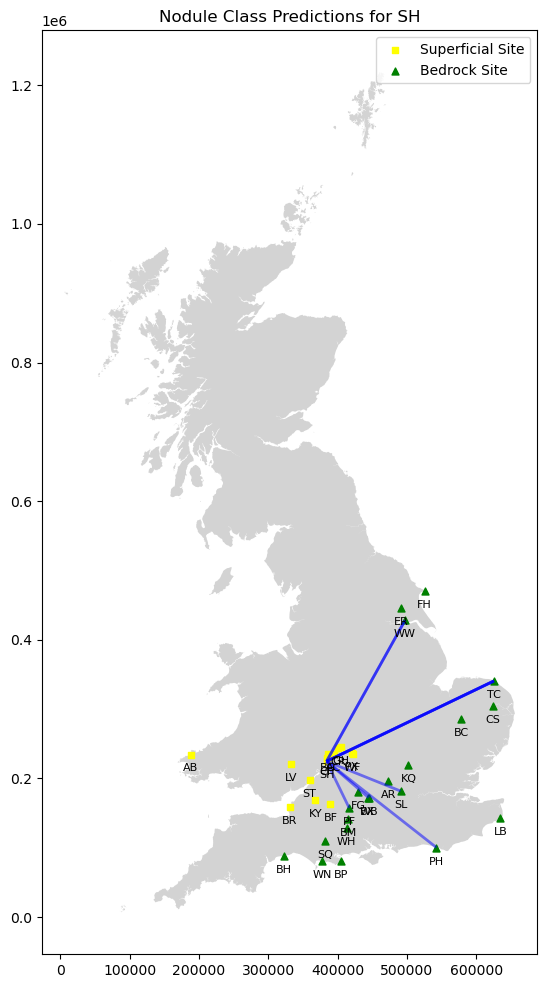

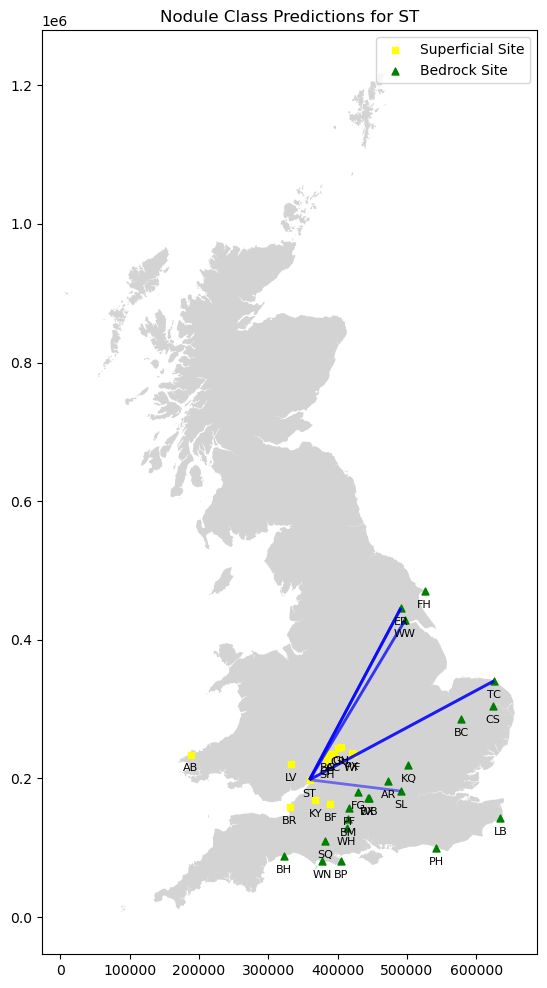

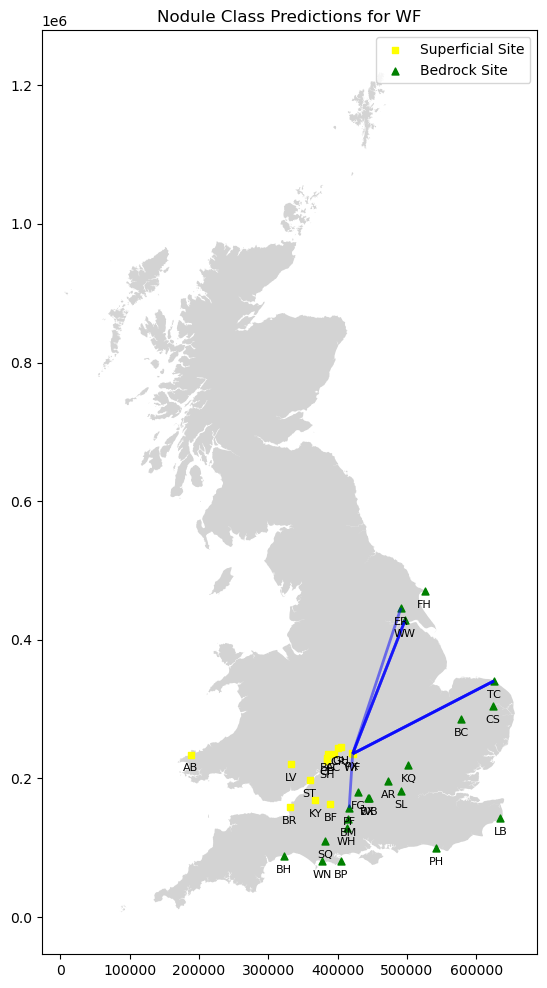

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, 
                                 geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Group the nodules by 'Superficial_Site'
grouped_by_superficial = grouped.groupby('Superficial_Site')

# Function to adjust label placement to prevent overlap
def adjust_label_placement(geom, label, ax, fontsize):
    x, y = geom.x, geom.y
    label_x, label_y = ax.transData.transform_point((x, y))
    
    # Define spacing between labels
    spacing = 8
    
    # Check if the label collides with any existing labels
    for existing_label, existing_position in adjust_label_placement.labels.items():
        if abs(label_x - existing_position[0]) < spacing and abs(label_y - existing_position[1]) < spacing:
            # If there is a collision, adjust the label's position
            label_y -= spacing * fontsize / 12  # Adjust spacing based on fontsize
    
    adjust_label_placement.labels[label] = (label_x, label_y)
    
    return label_x, label_y

# Initialize dictionary to store label positions
adjust_label_placement.labels = {}

# Iterate through each 'Superficial_Site' group
for superficial_site, group in grouped_by_superficial:
    # Create a new figure for each site
    fig, ax = plt.subplots(figsize=(12, 12))
    
    # Plot background
    mapping.plot(ax=ax, color='lightgrey')
    
    # Plot 'Superficial' sites as yellow squares
    superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
    superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')
    
    # Label 'Superficial' sites
    for _, row in superficial_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=8)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=8,
                     ha='center', va='center', xytext=(0, -10), textcoords='offset points')
    
    # Plot 'Bedrock' sites as green triangles
    bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
    bedrock_gdf.plot(ax=ax, marker='^', color='green', markersize=25, label='Bedrock Site')
    
    # Label 'Bedrock' sites
    for _, row in bedrock_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=8)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=8,
                     ha='center', va='center', xytext=(0, -10), textcoords='offset points')
    
    # Filter the group to only include rows with the current 'Superficial_Site'
    group = group[group['Superficial_Site'] == superficial_site]
    
    # Iterate through the filtered group and create lines
    for _, row in group.iterrows():
        bedrock_site = row['class_prediction']
        
        # Filter the GeoDataFrames to get the corresponding coordinates
        superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        
        # Check if there are matching coordinates before creating the line
        if not superficial_site_coords.empty and not bedrock_site_coords.empty:
            superficial_coords = superficial_site_coords.values[0]
            bedrock_coords = bedrock_site_coords.values[0]

            # Create a LineString between the superficial site and the bedrock site
            line = LineString([superficial_coords, bedrock_coords])

            # Plot the LineString
            gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)
    
    plt.title(f'Nodule Class Predictions for {superficial_site}')
    plt.legend()
    plt.show()


# DRAWING LINES

# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, 
                                 geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot background
mapping.plot(ax=ax, color='lightgrey')

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

plt.title('Nodule Class Predictions')
plt.legend()
plt.show()

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, 
                                 geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Plot background
mapping.plot(ax=ax, color='lightgrey')

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')


# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Check inlierLabel and change line color accordingly
        inlier_label = row.get('inlierLabel', 0)
        line_color = 'red' if inlier_label < 0 else 'blue'
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color=line_color, linewidth=2, alpha=0.5)


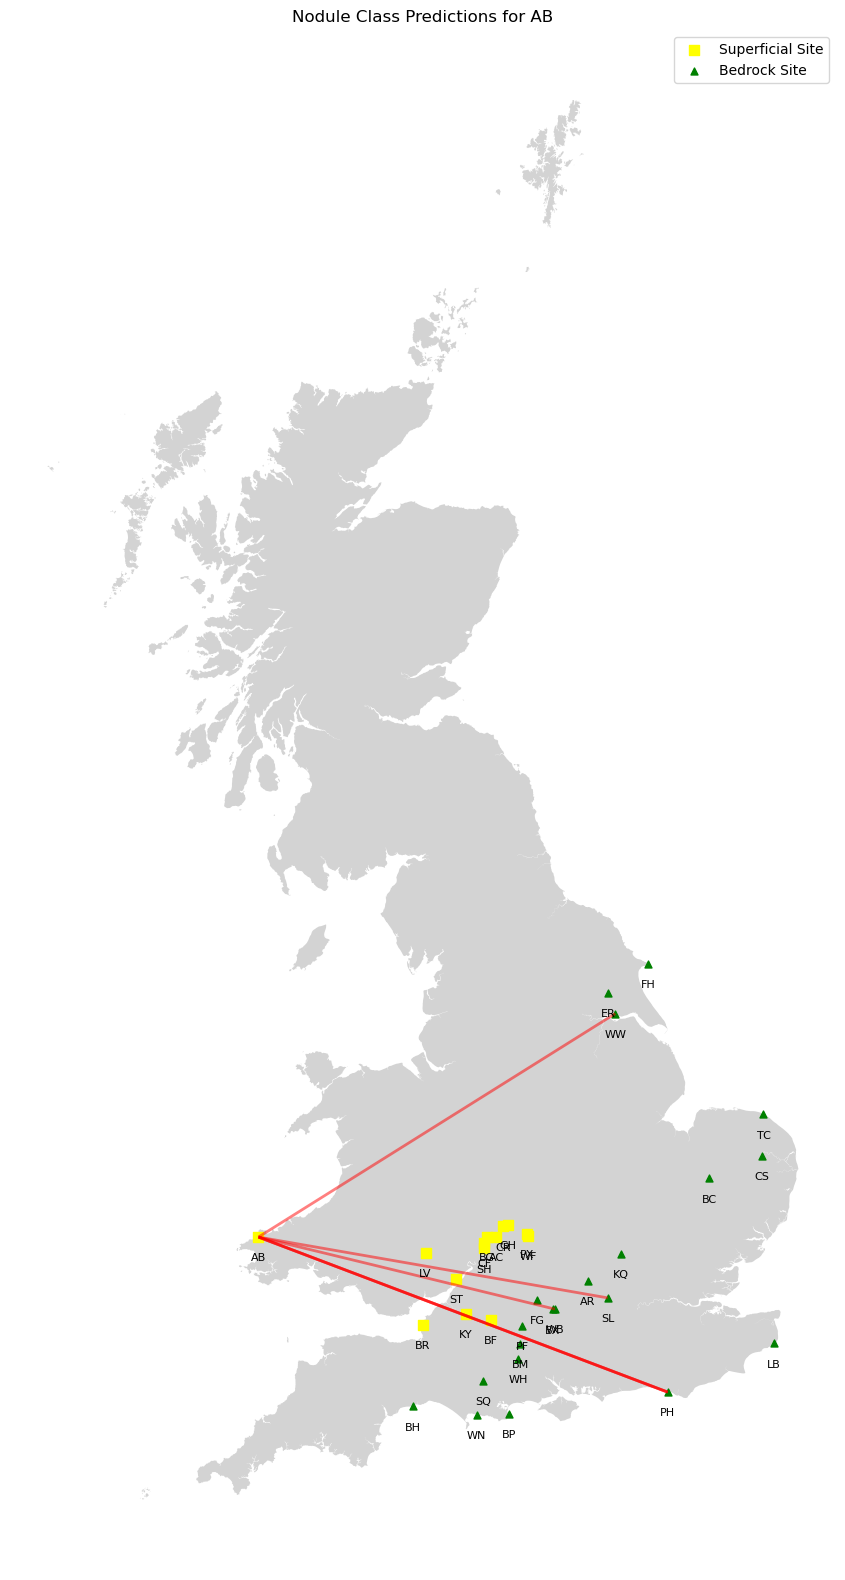

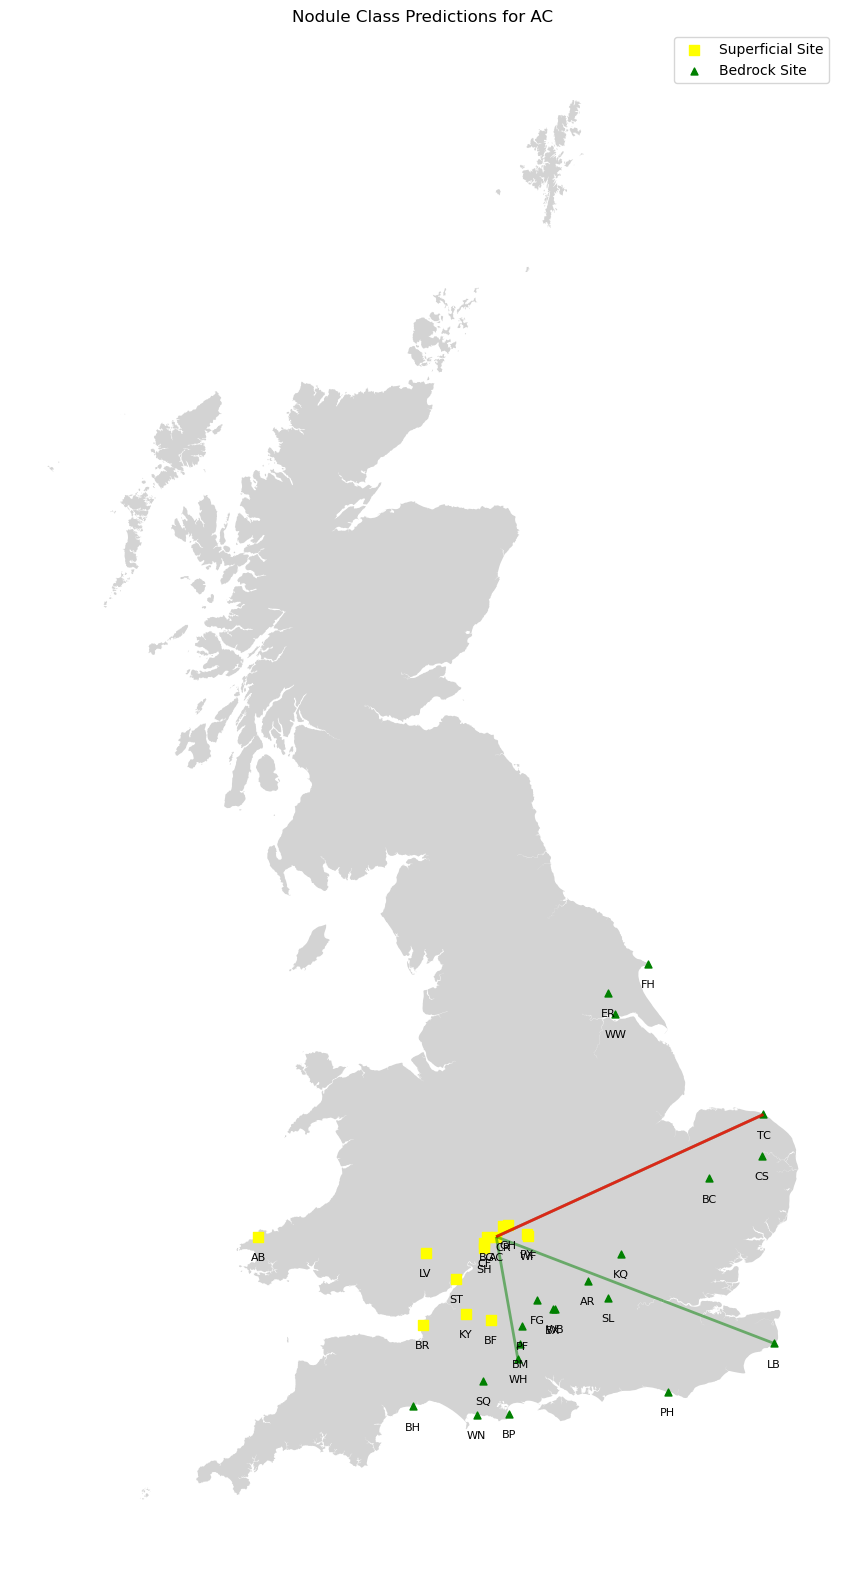

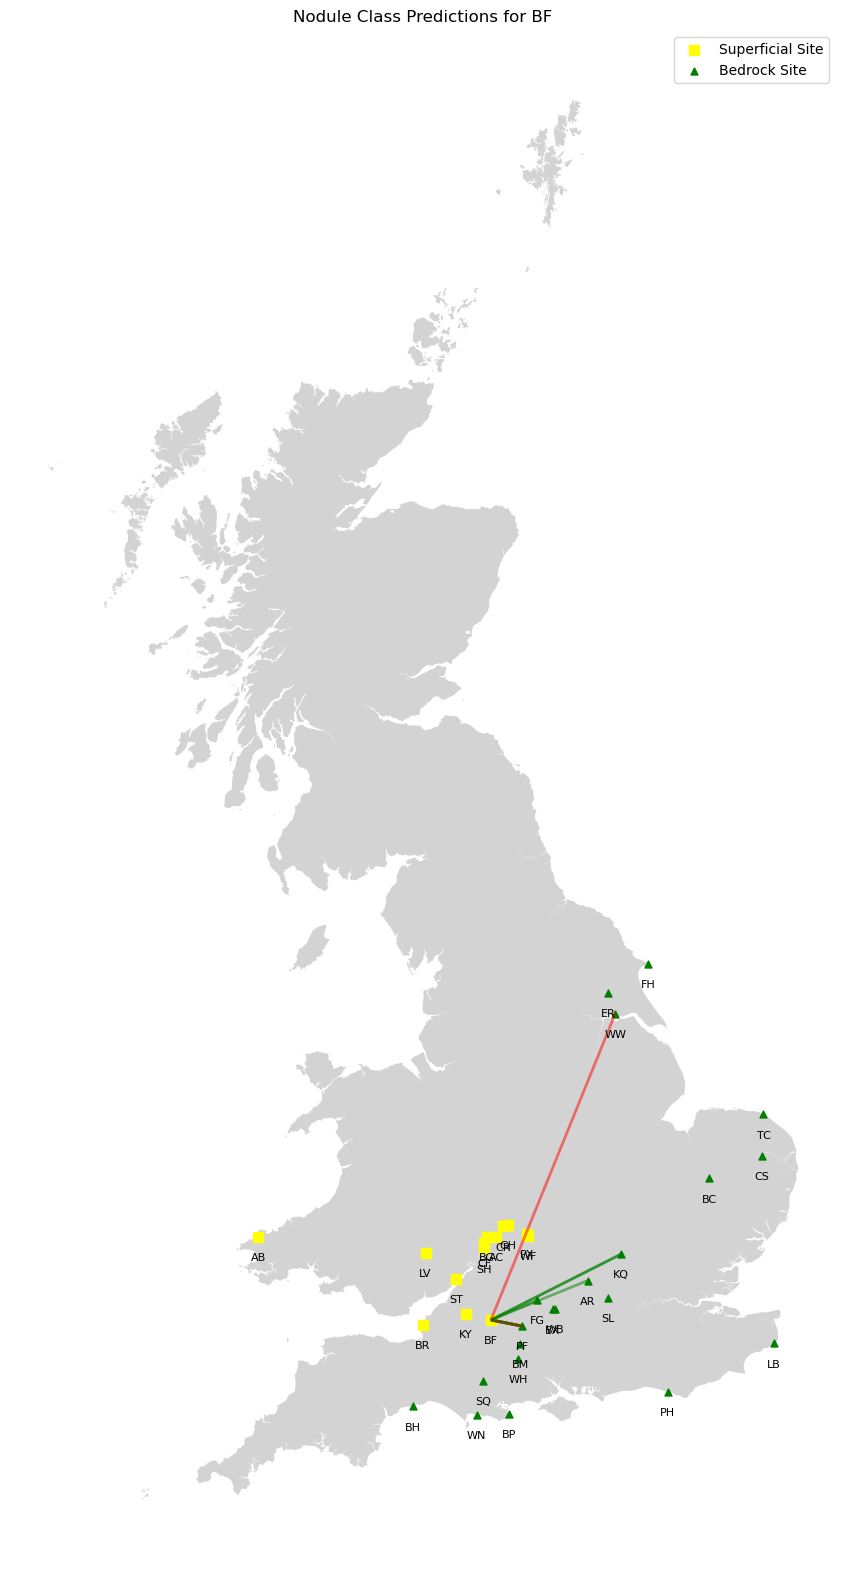

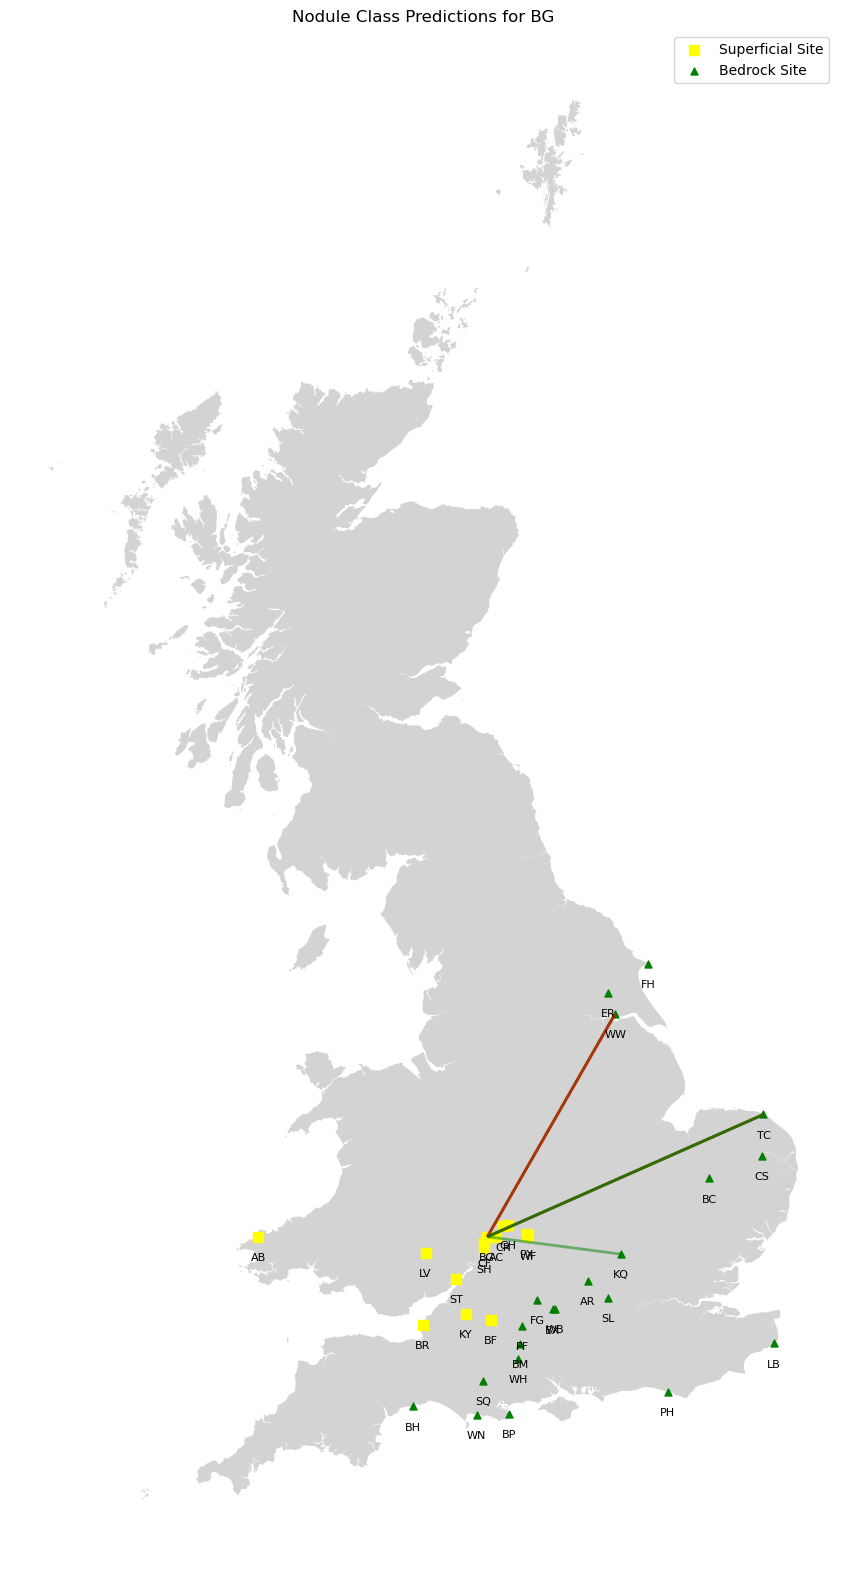

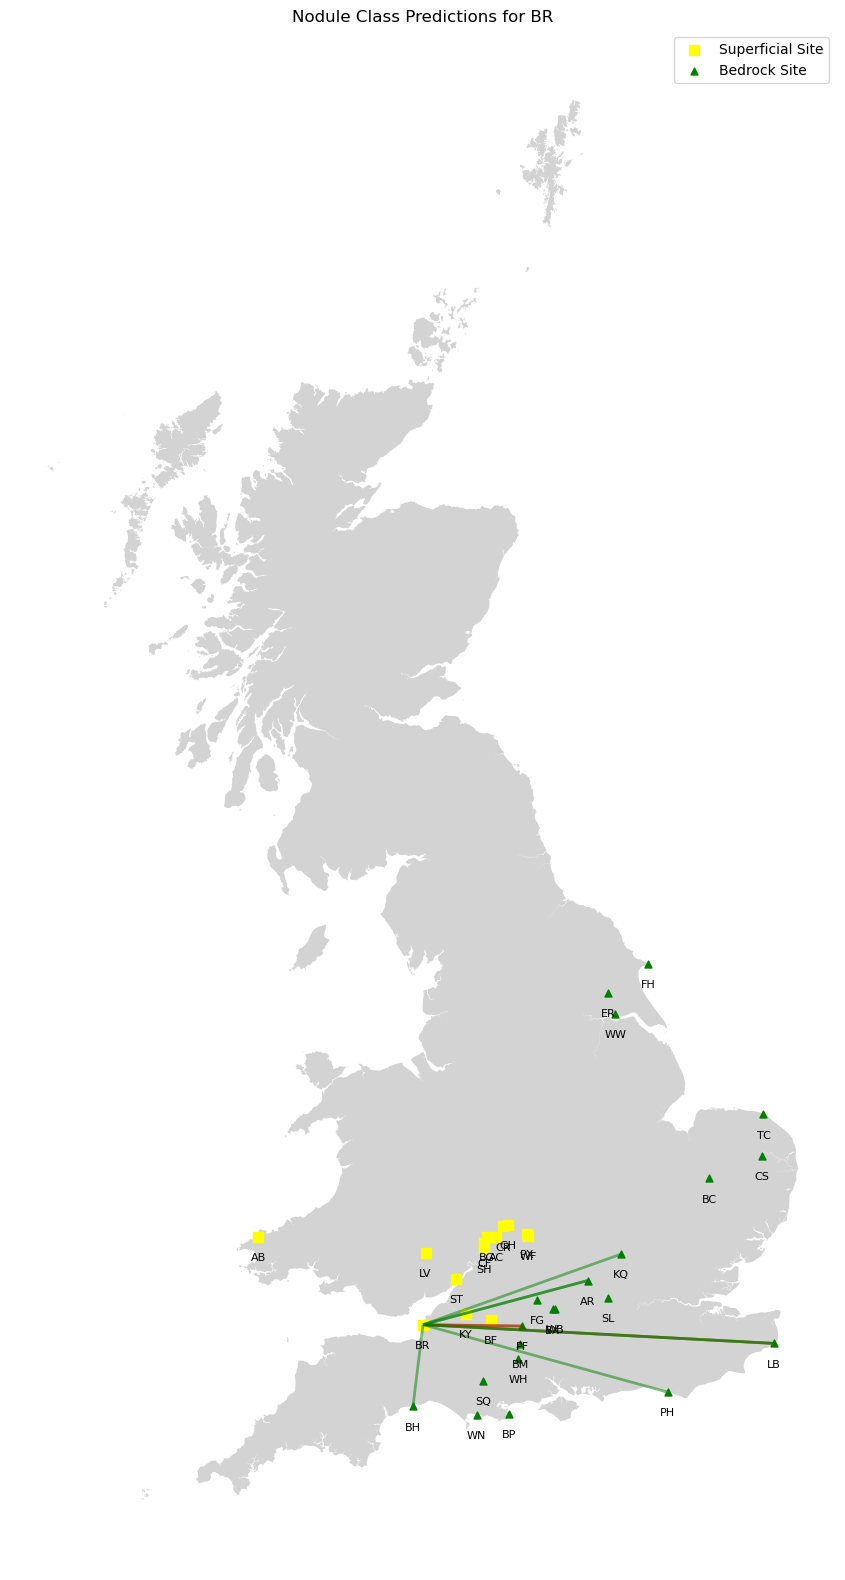

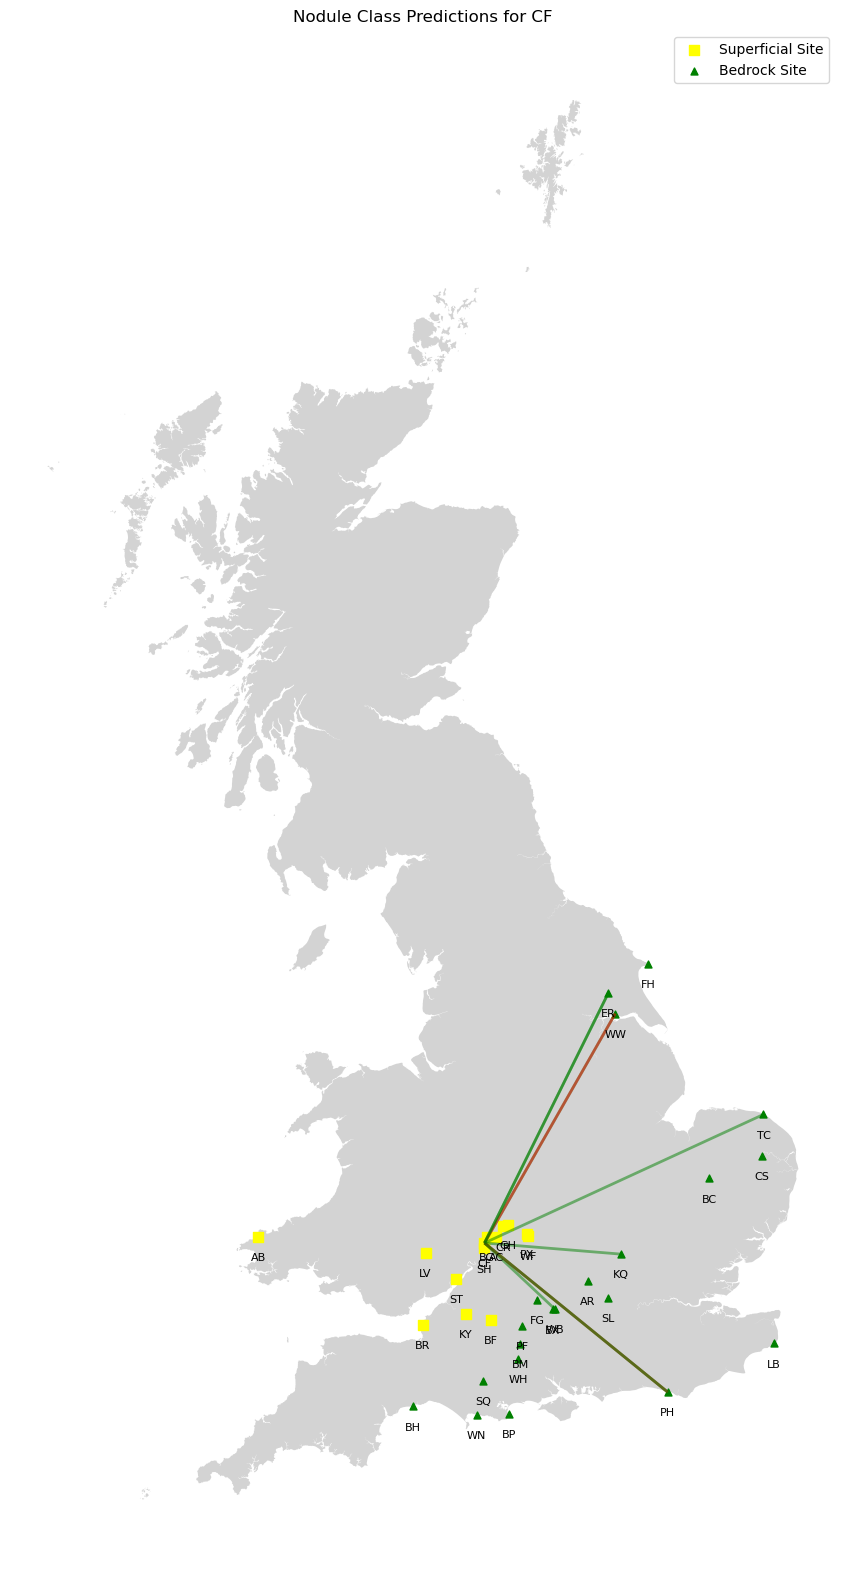

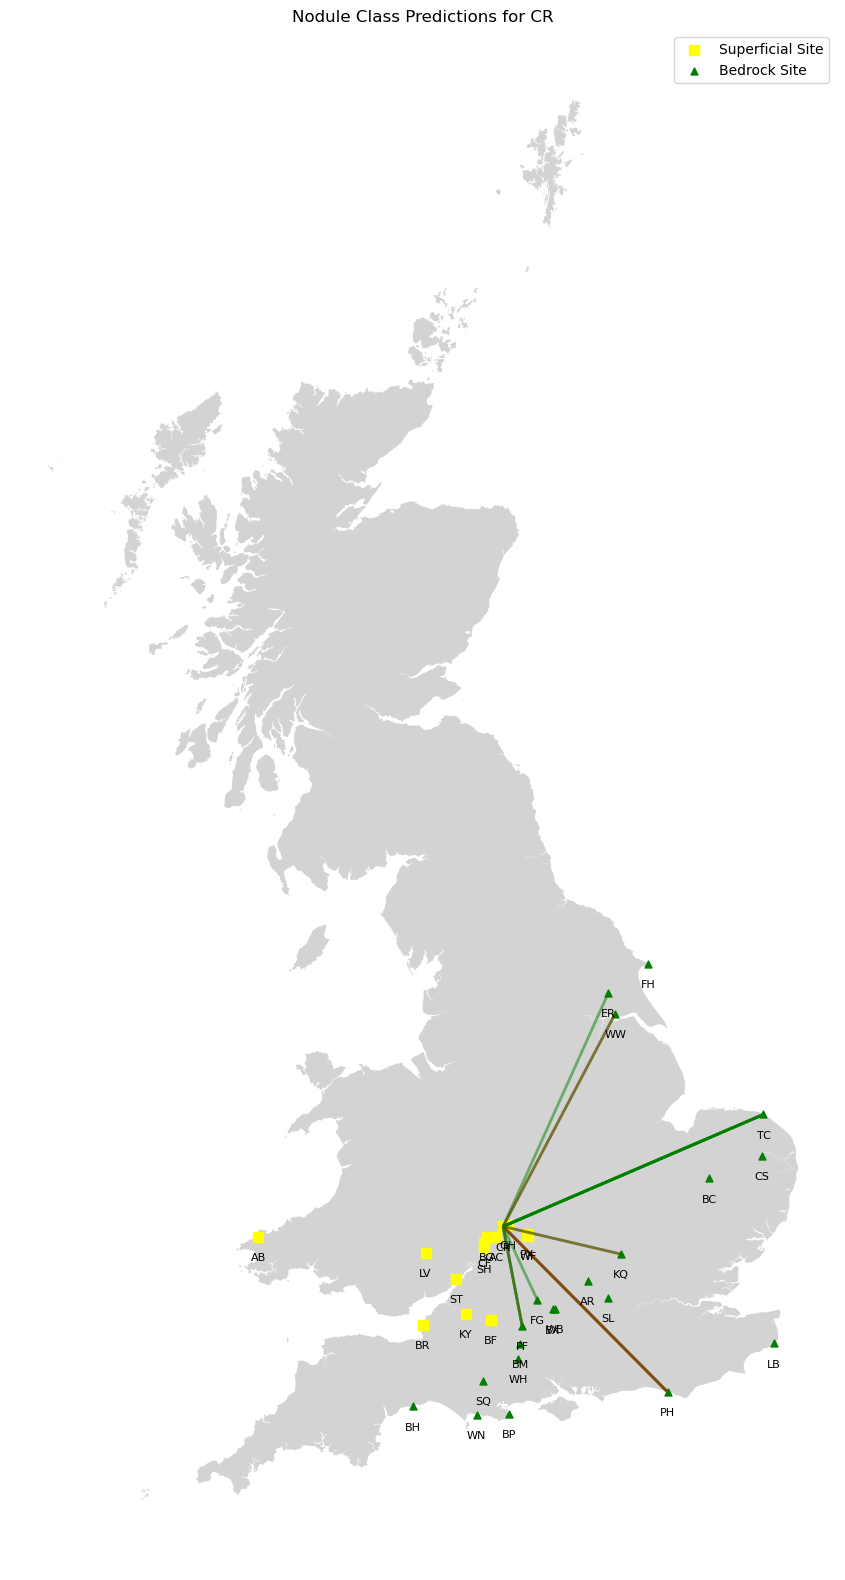

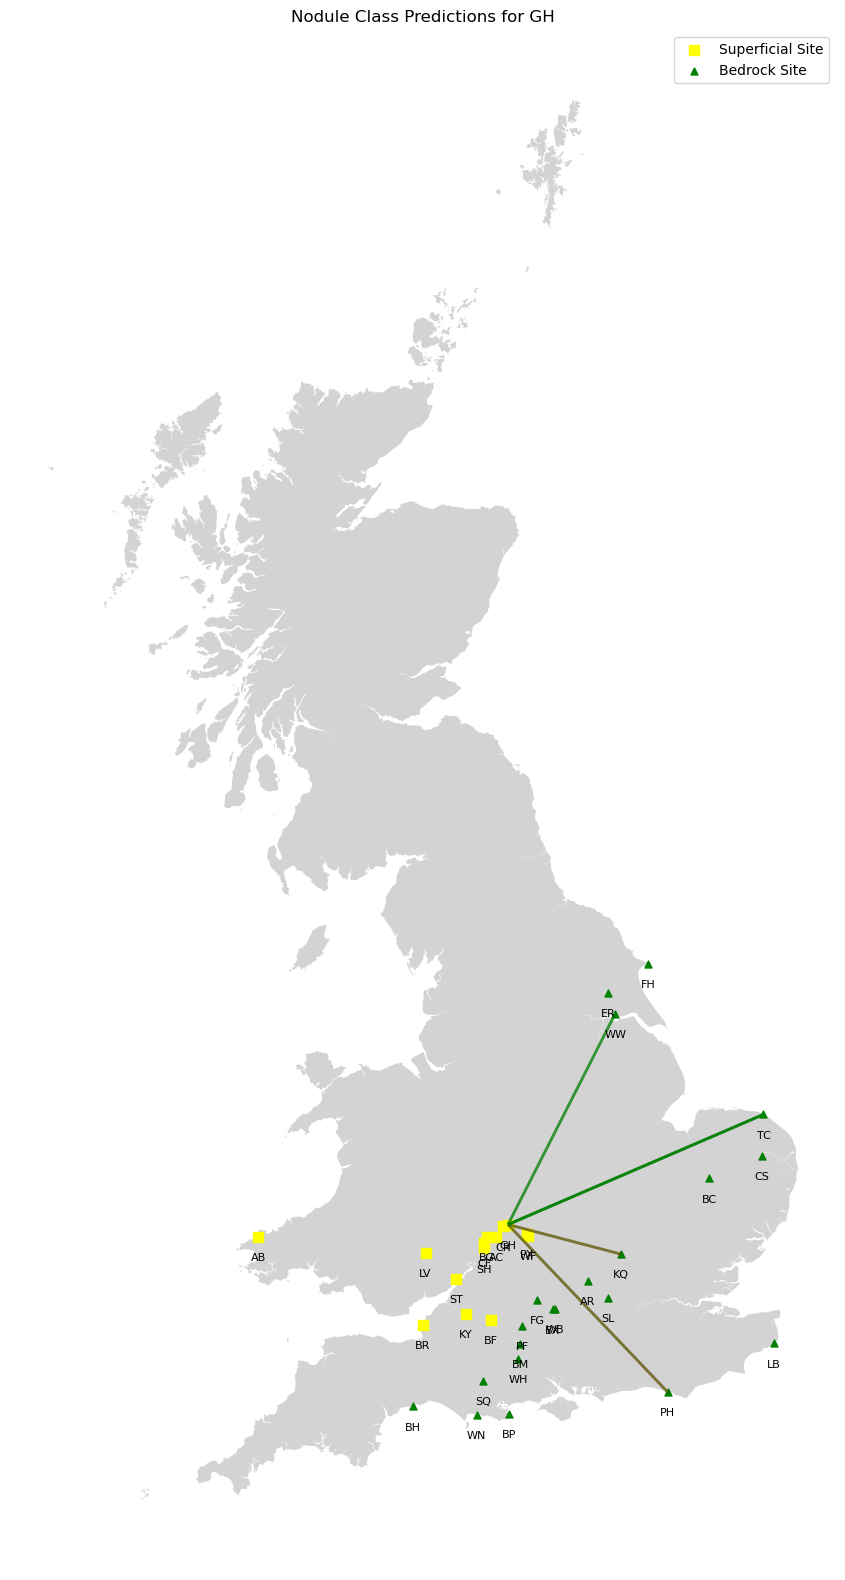

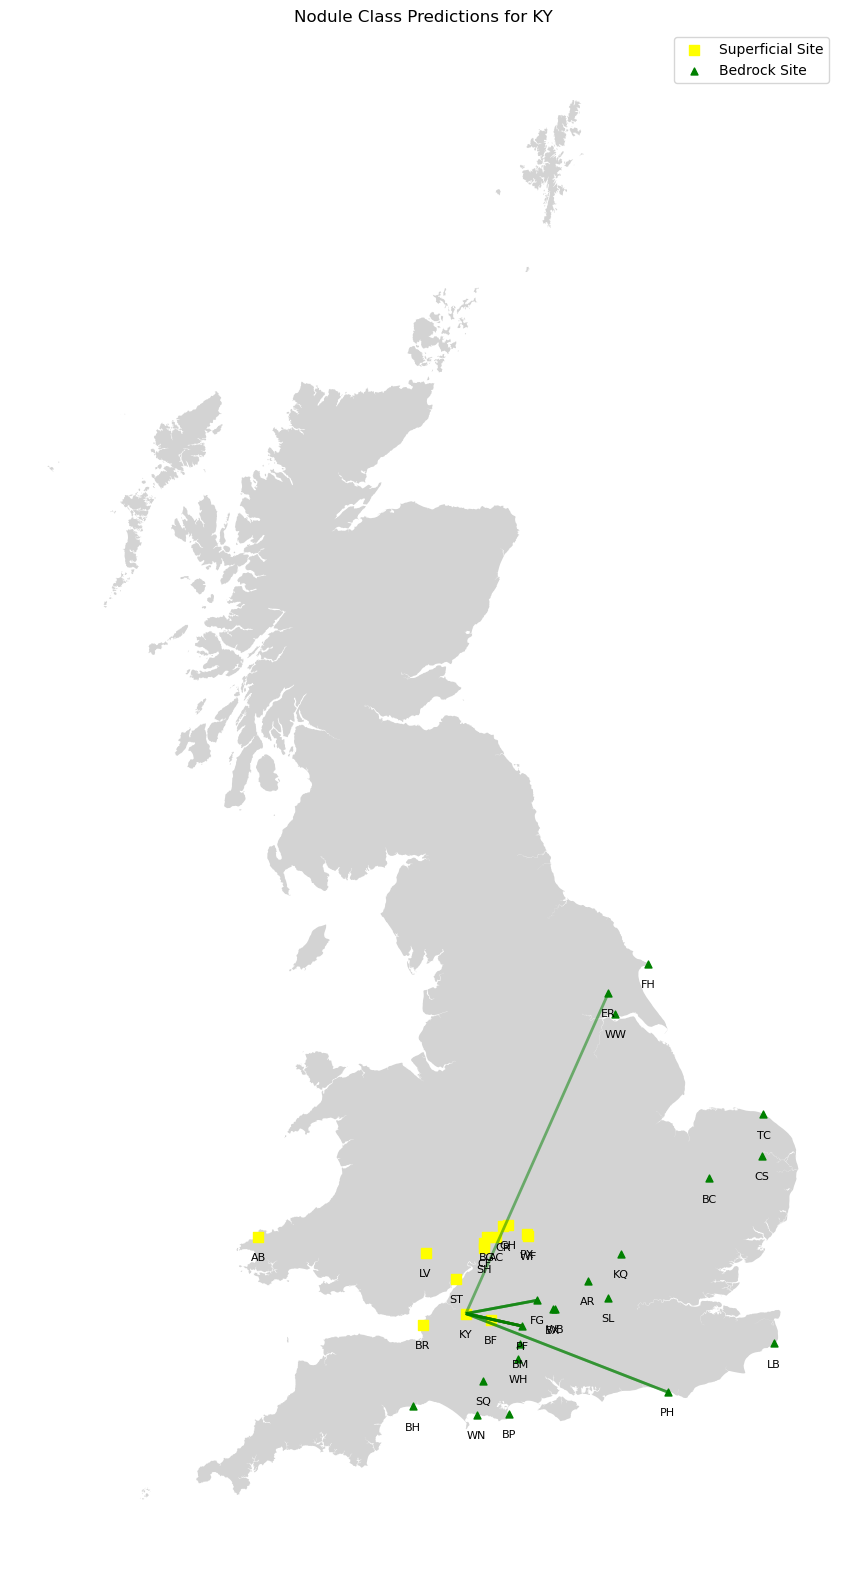

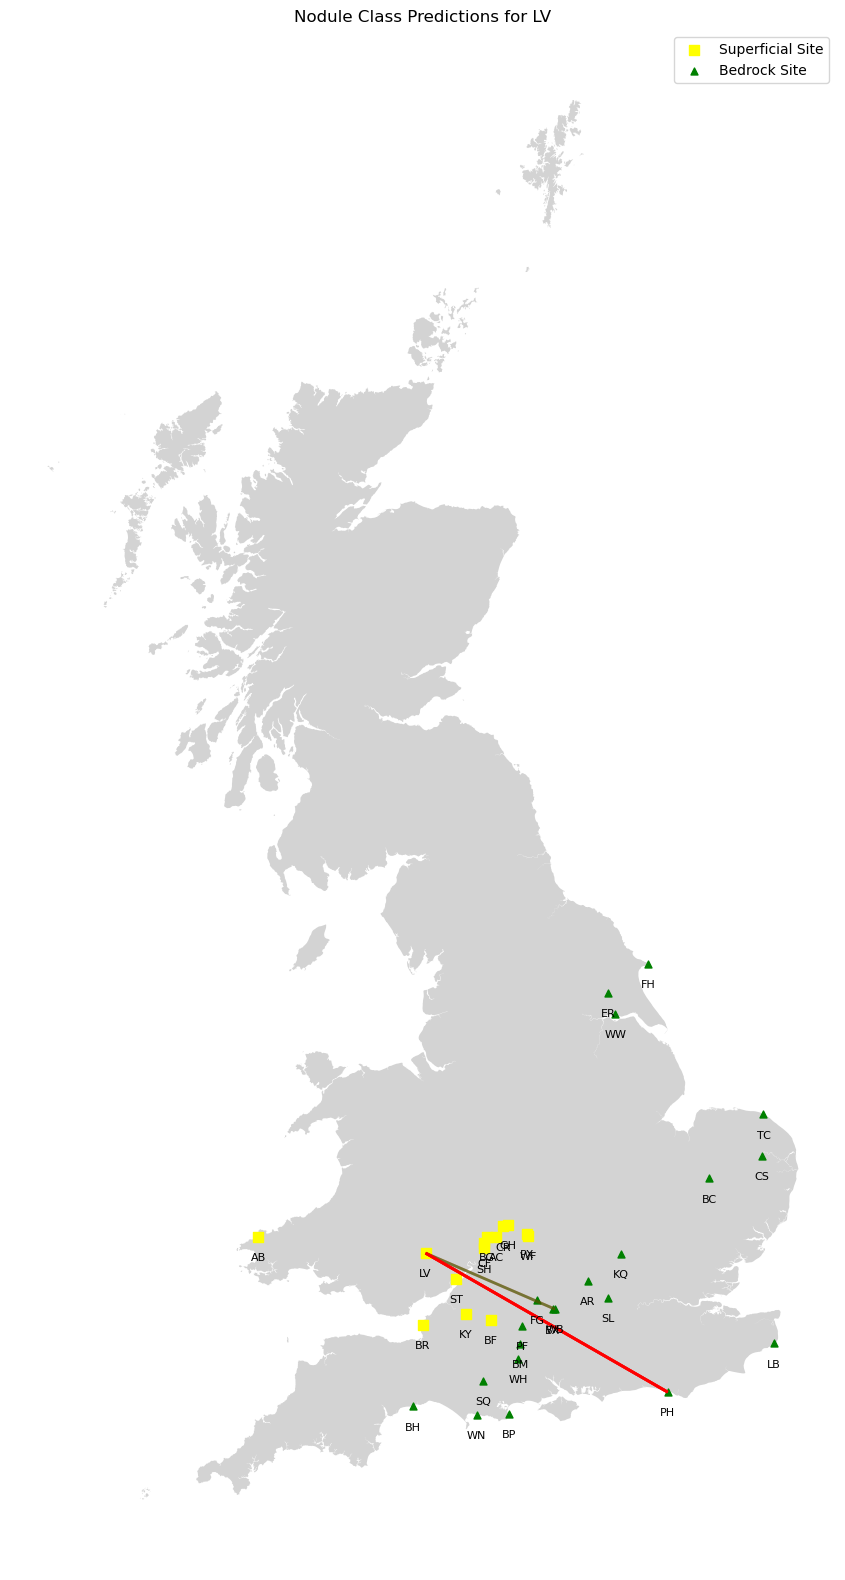

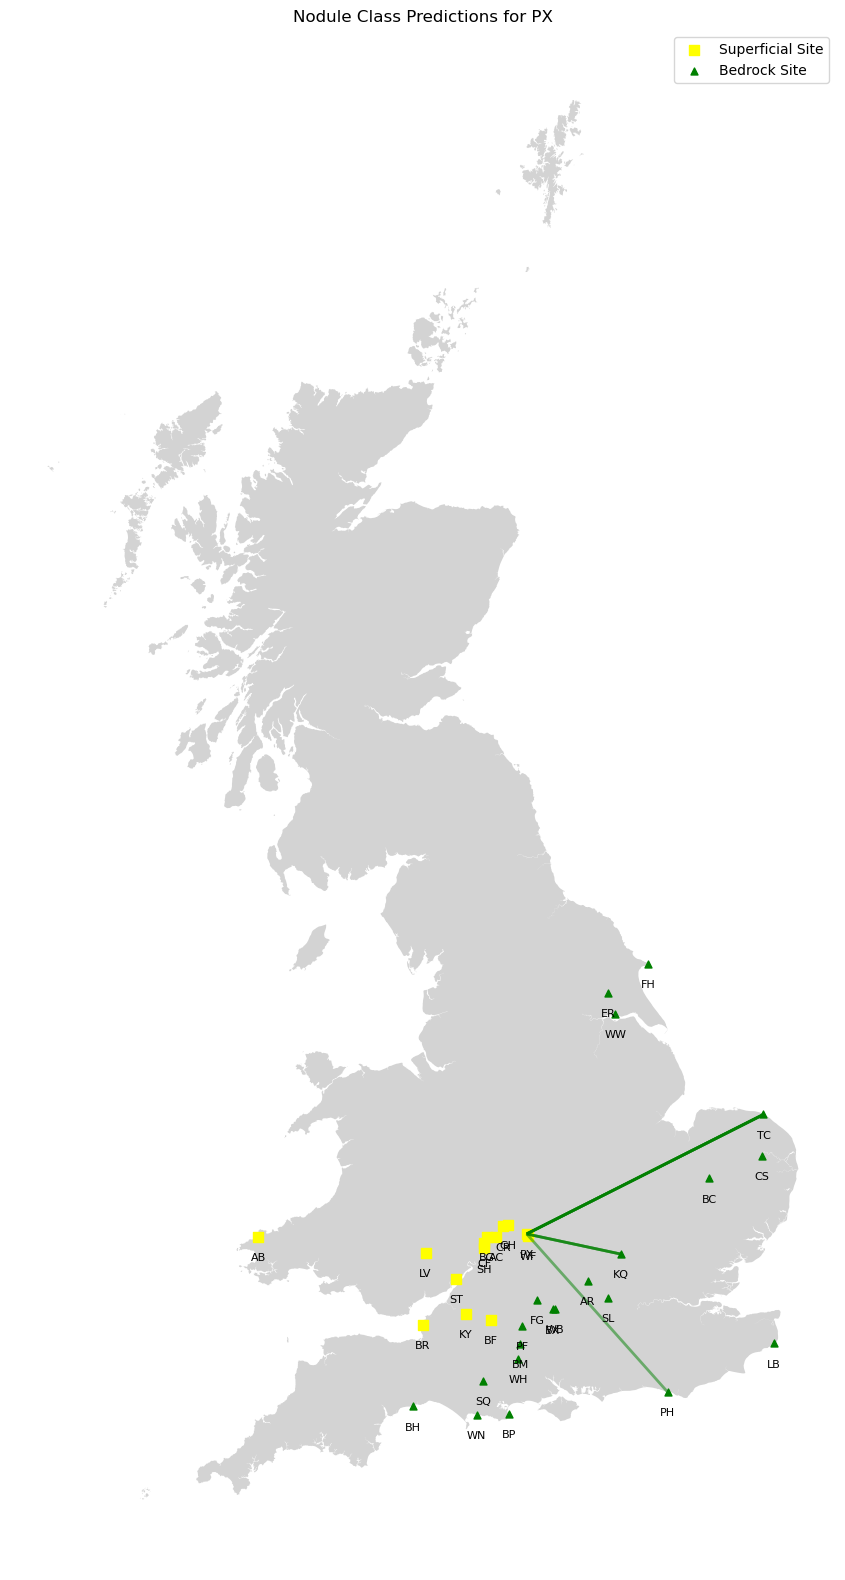

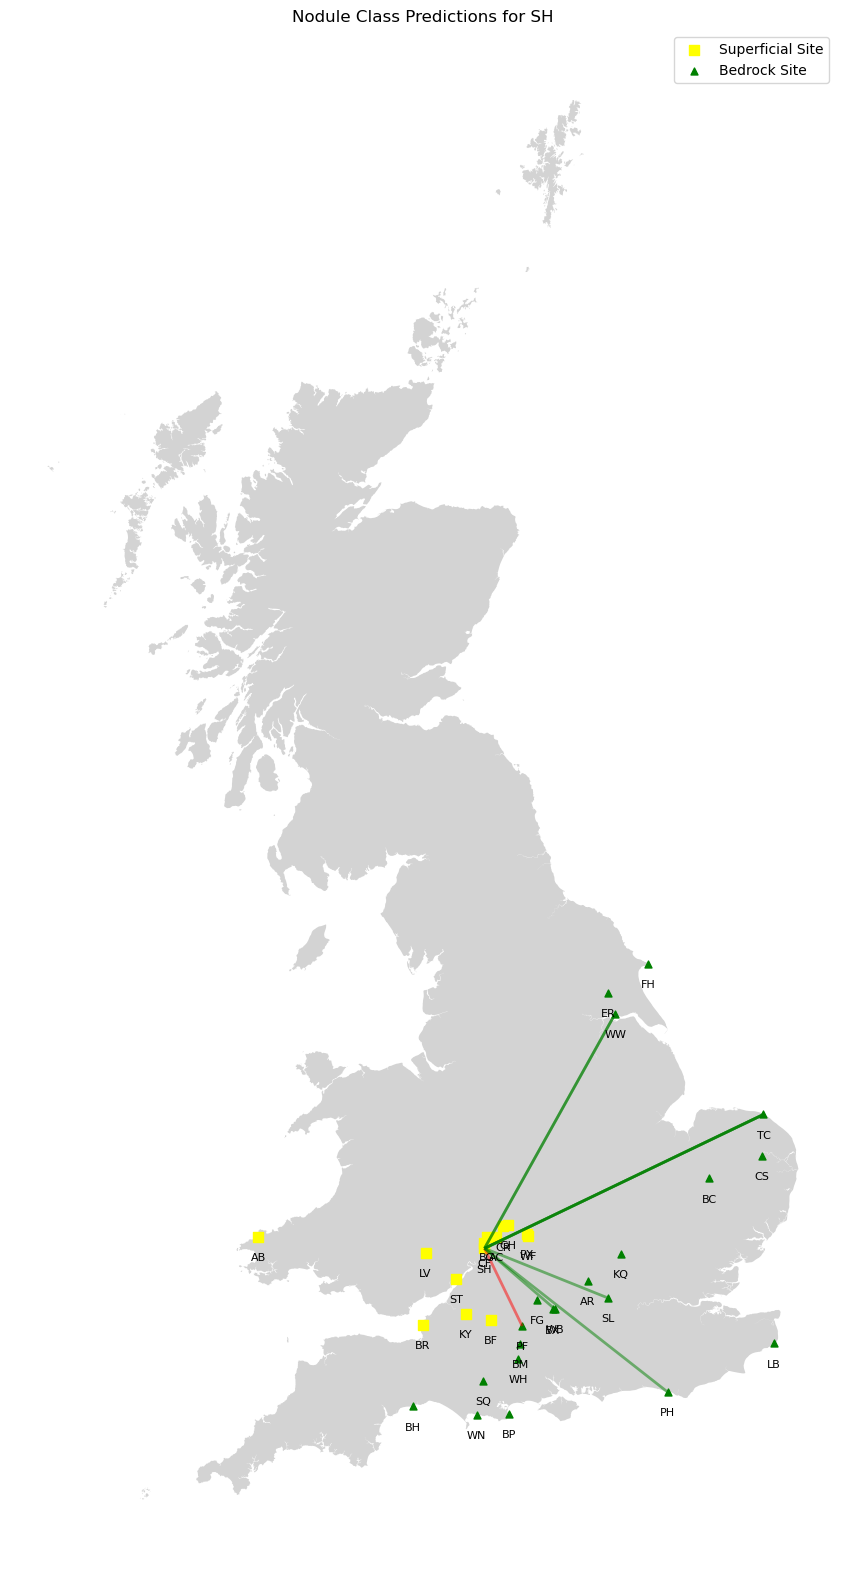

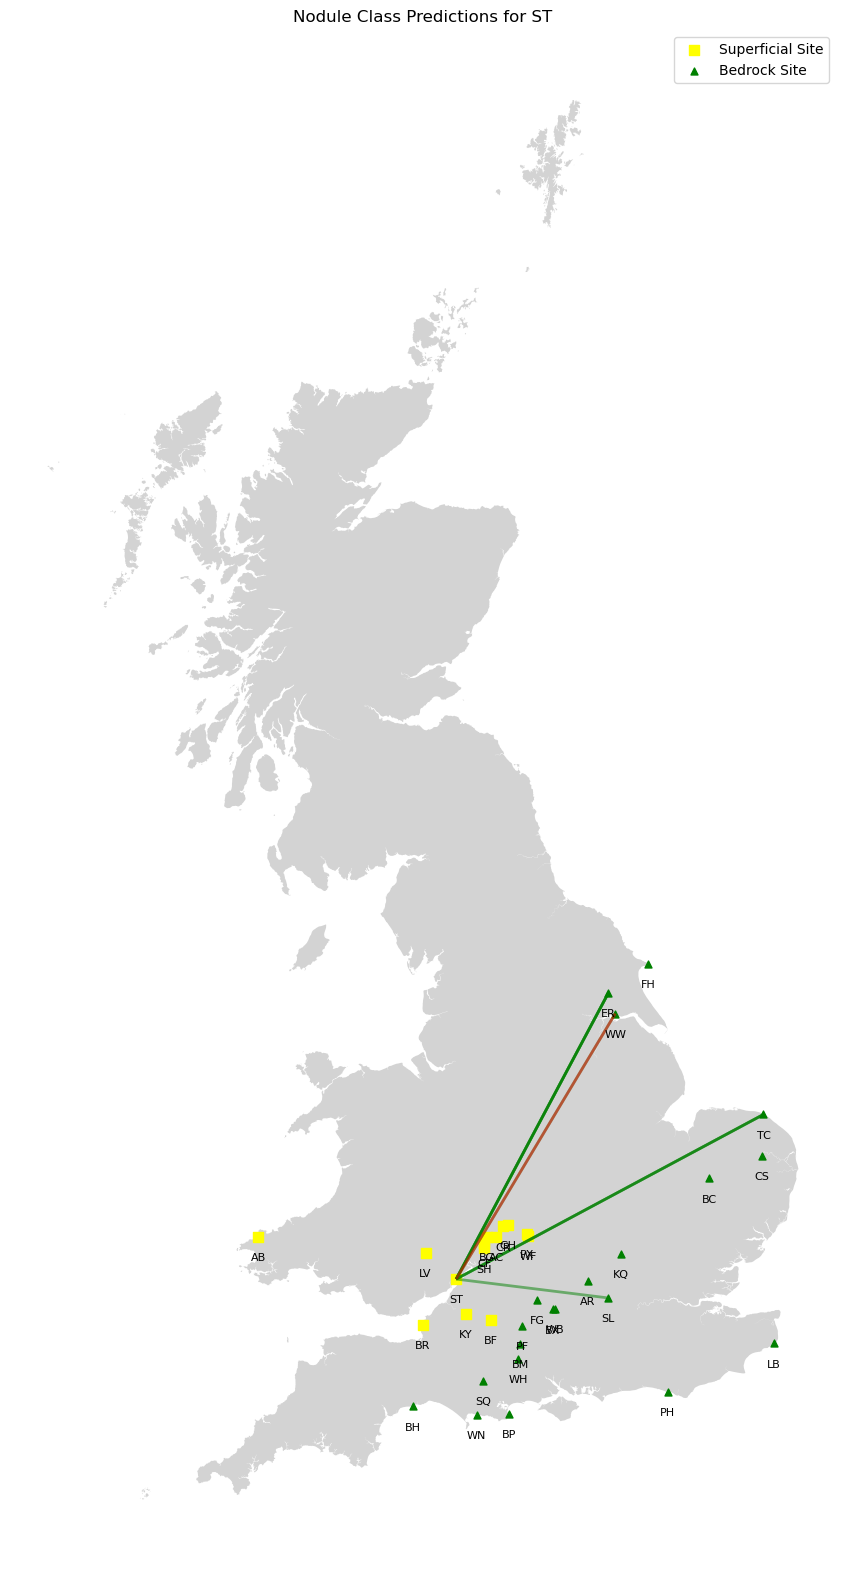

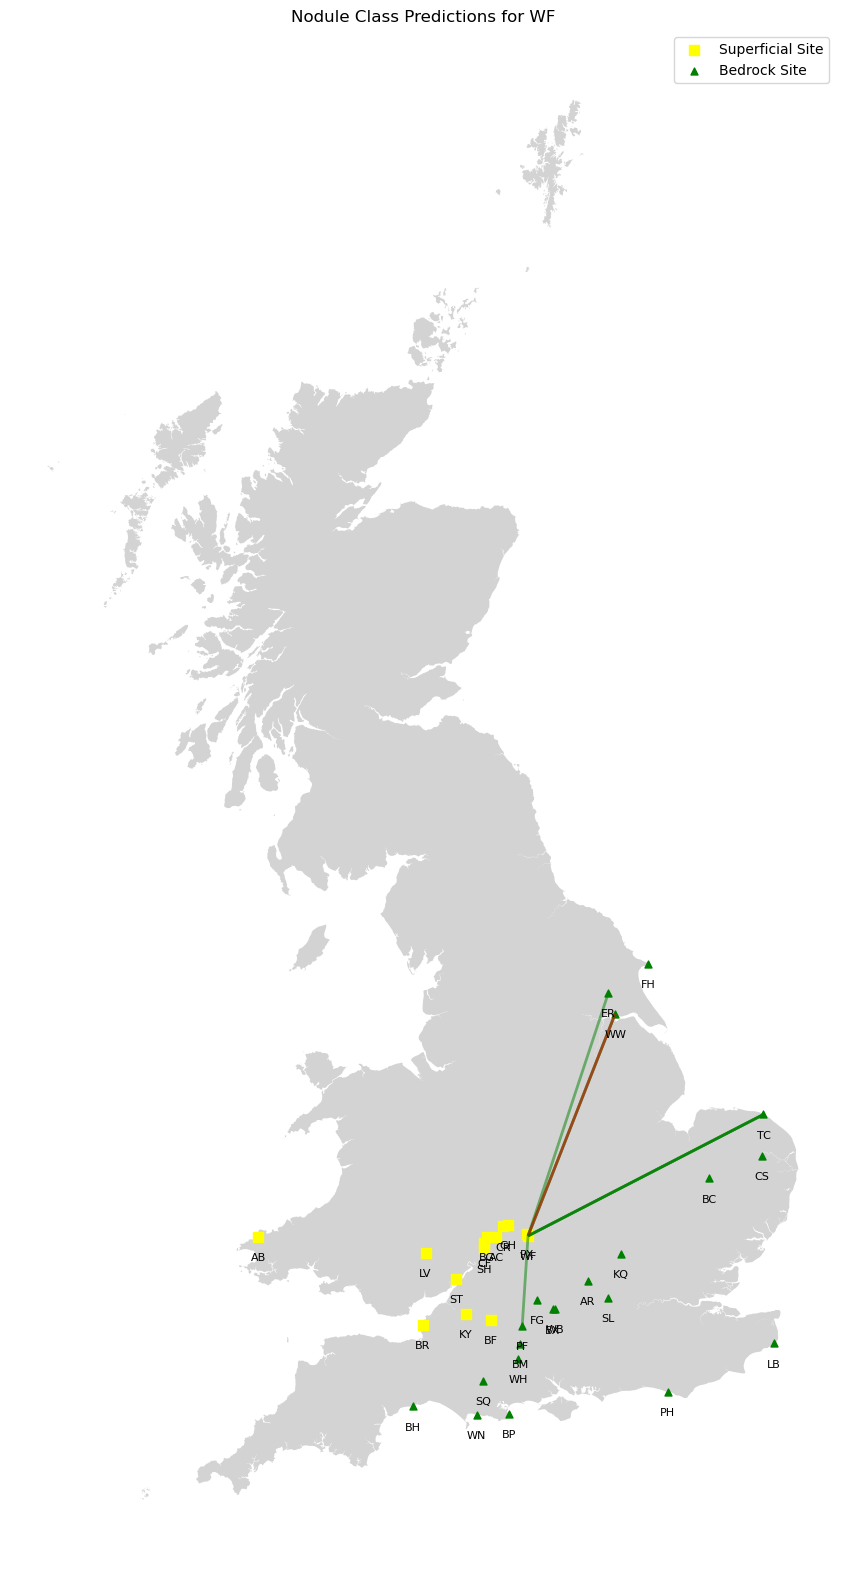

In [34]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from shapely.geometry import Point, LineString

# Create background map
mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")
img = Image.open('B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif')


# Initialize GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(combined_sites, geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y']))

# Group the nodules by 'Superficial_Site'
grouped_by_superficial = grouped.groupby('Superficial_Site')

# Function to adjust label placement to prevent overlap
def adjust_label_placement(geom, label, ax, fontsize):
    x, y = geom.x, geom.y
    label_x, label_y = ax.transData.transform_point((x, y))
    
    # Define spacing between labels
    spacing = 20
    
    # Check if the label collides with any existing labels
    for existing_label, existing_position in adjust_label_placement.labels.items():
        if abs(label_x - existing_position[0]) < spacing and abs(label_y - existing_position[1]) < spacing:
            # If there is a collision, adjust the label's position
            label_y -= spacing * fontsize / 6  # Adjust spacing based on fontsize
    
    adjust_label_placement.labels[label] = (label_x, label_y)
    
    return label_x, label_y

# Initialize dictionary to store label positions
adjust_label_placement.labels = {}

# Iterate through each 'Superficial_Site' group
for superficial_site, group in grouped_by_superficial:
    # Create a new figure for each site
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Plot background
    mapping.plot(ax=ax, color='lightgrey')
    
    
    # Plot 'Superficial' sites as yellow squares
    superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
    superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=50, label='Superficial Site')
    
    # Label 'Superficial' sites
    for _, row in superficial_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=8)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=8,
                     ha='center', va='center', xytext=(0, -15), textcoords='offset points')
    
    # Plot 'Bedrock' sites as green triangles
    bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
    bedrock_gdf.plot(ax=ax, marker='^', color='green', markersize=25, label='Bedrock Site')
    
    # Label 'Bedrock' sites
    for _, row in bedrock_gdf.iterrows():
        label_x, label_y = adjust_label_placement(row['geometry'], row['Site'], ax, fontsize=8)
        plt.annotate(row['Site'], (row['geometry'].x, row['geometry'].y), color='black', fontsize=8,
                     ha='center', va='center', xytext=(0, -15), textcoords='offset points')
    
    # Filter the group to only include rows with the current 'Superficial_Site'
    group = group[group['Superficial_Site'] == superficial_site]
    
    # Iterate through the filtered group and create lines
    for _, row in group.iterrows():
        bedrock_site = row['class_prediction']
        
        # Filter the GeoDataFrames to get the corresponding coordinates
        superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        
        # Check if there are matching coordinates before creating the line
        if not superficial_site_coords.empty and not bedrock_site_coords.empty:
            superficial_coords = superficial_site_coords.values[0]
            bedrock_coords = bedrock_site_coords.values[0]

            # Create a LineString between the superficial site and the bedrock site
            line = LineString([superficial_coords, bedrock_coords])
            
            # Check inlierLabel and change line color accordingly
            inlier_label = row.get('inlierLabel', 0)
            line_color = 'red' if inlier_label < 0 else 'green'
        
            # Plot the LineString
            gpd.GeoSeries([line]).plot(ax=ax, color=line_color, linewidth=2, alpha=0.5)
    
    
    # Remove x and y axis markers
    ax.set_axis_off()
    
    
    plt.title(f'Nodule Class Predictions for {superficial_site}')
    plt.legend()
    
    plt.show()


In [35]:
print(grouped.columns)

Index(['Superficial_Site', 'Nodule', 'FH', 'ER', 'WW', 'TC', 'CS', 'KQ', 'AR',
       'SL', 'FG', 'WB', 'PF', 'WH', 'SQ', 'WN', 'BH', 'PH', 'LB',
       'inlierLabel', 'class_prediction'],
      dtype='object')


In [38]:
import matplotlib.lines as mlines
from collections import defaultdict
from shapely.geometry import Point, LineString
from PIL import Image
from shapely.geometry import Point, LineString

# Create background map
#mapping = gpd.read_file("B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")
mapping = Image.open('B:/GIS/OS_GEO_DATA/OSTerrain50/2024_AllRasterMerge/Dec2024_All.tif')




# Function to label sites
def label_sites(ax, gdf, label_column):
    for _, row in gdf.iterrows():
        ax.annotate(row[label_column], (row['geometry'].x, row['geometry'].y),
                    color='black', fontsize=8, ha='center', va='center',
                    xytext=(0, -15), textcoords='offset points')

# Iterate over each group in 'grouped'
for superficial_site, group in grouped_by_superficial:
    # Initialize dictionaries to track line counts and labels (reset for each iteration)
    line_counts = defaultdict(int)
    line_labels = {}

    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Plot background map
    mapping.plot(ax=ax, color='lightgrey')
    
    # Plot superficial and bedrock sites
    superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
    superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=50, label='Superficial Site')
    label_sites(ax, superficial_gdf, 'Site')  # Label superficial sites
    
    bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
    bedrock_gdf.plot(ax=ax, marker='^', color='green', markersize=25, label='Bedrock Site')
    label_sites(ax, bedrock_gdf, 'Site')  # Label bedrock sites

    # Loop over rows in 'group' to draw lines between bedrock and superficial sites
    for _, row in group.iterrows():
        bedrock_site = row['class_prediction']
        superficial_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        bedrock_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        
        if not superficial_coords.empty and not bedrock_coords.empty:
            superficial_point = Point(superficial_coords.values[0].x, superficial_coords.values[0].y)  # Convert to Point
            bedrock_point = Point(bedrock_coords.values[0].x, bedrock_coords.values[0].y)  # Convert to Point
            
            # Count each connection between bedrock and superficial site
            line_counts[(bedrock_site, superficial_site)] += 1  # Count connections by bedrock_site first
            line_labels[(bedrock_site, superficial_site)] = f'{bedrock_site}-{superficial_site}'

    # Plot the lines once, using the line count to adjust appearance
    for (bedrock_site, superficial_site), count in line_counts.items():
        # Get inlier/outlier status from the 'inlierLabel' column of 'grouped'
        inlier_label = group[(group['Superficial_Site'] == superficial_site) & 
                             (group['class_prediction'] == bedrock_site)]['inlierLabel'].values[0]
        
        # Set color based on inlierLabel (< 0 = outlier, >= 0 = inlier)
        color = 'red' if inlier_label < 0 else 'green'
        
        # Recreate the LineString for the connection
        bedrock_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        superficial_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        line = LineString([bedrock_coords.values[0], superficial_coords.values[0]])
        
        # Plot the line
        gpd.GeoSeries([line]).plot(ax=ax, color=color, linewidth=2, alpha=0.5)

    # Add scale bar (100 km)
    add_scale_bar(ax, length_km=100)  # Set scale bar to 100 km
    
    # Add north arrow at the top-right, aligned with the legend
    add_north_arrow(ax, location=(0.95, 0.95), size=50)
    
    # Create the general legend for site types
    site_legend = ax.get_legend_handles_labels()[0]
    site_labels = ax.get_legend_handles_labels()[1]

    # Create the legend for Inlier and Outlier connections (green and red lines)
    green_line = mlines.Line2D([], [], color='green', linewidth=2, label='Inlier Connection')
    red_line = mlines.Line2D([], [], color='red', linewidth=2, label='Outlier Connection')

    # Create a list for connection results (Line/Connection results with count)
    connection_results = [f'{line_labels[(bedrock_site, superficial_site)]} N = {count}' for (bedrock_site, superficial_site), count in line_counts.items()]
    labels.append('')  # Empty label for spacing
    labels.append('')  # Extra empty label for more spacing
    
    # Create combined legend labels, including the site types, Inlier/Outlier connections, and connection results
    handles = site_legend + [green_line, red_line]
    labels = site_labels + ['Inlier Connection', 'Outlier Connection']
    
    # Add connection results to the legend as coloured lines with labels
    for result in connection_results:
        color = 'green' if 'inlier' in result.lower() else 'red'  # Use green for inlier, red for outlier
        handles.append(mlines.Line2D([], [], color=color, linewidth=2))  # Add coloured line
        labels.append(result)  # Add the actual result text
        
    # Add a couple of lines to create spacing after Outlier Connection
    handles.append(mlines.Line2D([], [], color='none', linewidth=0))  # Empty line for spacing
    handles.append(mlines.Line2D([], [], color='none', linewidth=0))  # Extra empty line for more spacing

    # Set legend in upper-left corner with extra spacing at the bottom
    ax.legend(handles=handles, labels=labels, loc='upper left', fontsize=10, bbox_to_anchor=(0, 1), title="Legend")

    # Remove axes for a clean plot
    ax.set_axis_off()
    
    # Add title
    plt.title(f'Nodule Class Predictions for {superficial_site}')
    
    # Save the plot as a PDF
    plt.savefig(f'figures/{superficial_site}_nodule_predictions.pdf', format='pdf', bbox_inches='tight')
    plt.savefig(f'figures/{superficial_site}_nodule_predictions.eps', format='eps', bbox_inches='tight')
    plt.close(fig)


DecompressionBombError: Image size (324720000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

from PIL import Image
import matplotlib.image as mpimg

img = Image.open('B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif')

imgplot = plt.imshow(img)

from osgeo import gdal

img = "B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"

rasterMap = gdal.Open(img)


# Extract geotransform information
transform = rasterMap.GetGeoTransform()

# Assuming you have loaded your data into DataFrames as follows:
# combined_sites (DataFrame with 'Site', 'Site_Type', 'OS_BNG_X', 'OS_BNG_Y')
# grouped (DataFrame containing 'Nodule', 'Superficial_Site', 'class_prediction')

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Display the raster data as a background
show((rasterMap, 1), ax=ax, cmap='gray', transform=transform)

# Plot 'Superficial' sites as yellow squares
superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

# Remove x and y axis markers
ax.set_axis_off()

plt.title('Nodule Class Predictions')
plt.legend()
plt.show()

import matplotlib.image as mpimg

# Load your raster image
raster_image_path = "B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"
raster_image = mpimg.imread(raster_image_path)

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))


# Set x-axis and y-axis limits to define the coordinate system
#ax.set_xlim(0, 100000)
#ax.set_ylim(-100000, 0)

## Get the current x-axis and y-axis limits
#x_limits = ax.get_xlim()
#y_limits = ax.get_ylim()

#print("Current x-axis limits:", x_limits)
#print("Current y-axis limits:", y_limits)




# Plot your other data on top of the raster image
# For example, plot 'Superficial' sites as yellow squares
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Iterate through each row in the 'grouped' DataFrame and plot lines
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']
    
    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
    
    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        
        # Plot the LineString
        gpd.GeoSeries([line]).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)
        
# Display the raster data as a background
#ax.imshow(raster_image, extent=[0.0, 5400.0, -6000.0, 0.0], cmap='gray', origin='upper')

# Add labels, legend, and other customizations as needed
plt.title('Nodule Class Predictions')
plt.legend()
plt.axis('off')  # Turn off axis markers
plt.show()


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shapely.geometry import LineString
import geopandas as gpd

# Load your raster image
raster_image_path = "B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"
raster_image = mpimg.imread(raster_image_path)

# Create a new figure
fig, ax = plt.subplots(figsize=(12, 12))

# Set x-axis and y-axis limits to define the coordinate system
ax.set_xlim(0, 5400)
ax.set_ylim(-6000, 0)



# Plot your other data on top of the raster image
# For example, plot 'Superficial' sites as yellow squares
superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=25, label='Superficial Site')

# Plot 'Bedrock' sites as green squares
bedrock_gdf.plot(ax=ax, marker='s', color='green', markersize=25, label='Bedrock Site')

# Precompute lines
lines = []
for _, row in grouped.iterrows():
    superficial_site = row['Superficial_Site']
    bedrock_site = row['class_prediction']

    # Filter the GeoDataFrames to get the corresponding coordinates
    superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
    bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']

    # Check if there are matching coordinates before creating the line
    if not superficial_site_coords.empty and not bedrock_site_coords.empty:
        superficial_coords = superficial_site_coords.values[0]
        bedrock_coords = bedrock_site_coords.values[0]

        # Create a LineString between the superficial site and the bedrock site
        line = LineString([superficial_coords, bedrock_coords])
        lines.append(line)

# Display the raster data as a background
ax.imshow(raster_image, extent=[0.0, 5400.0, -6000.0, 0.0], cmap='gray', origin='upper')

# Plot the precomputed lines
gpd.GeoSeries(lines).plot(ax=ax, color='blue', linewidth=2, alpha=0.5)

# Add labels, legend, and other customizations as needed
plt.title('Nodule Class Predictions')
plt.legend()
plt.axis('off')  # Turn off axis markers
plt.show()


img = Image.open('B:\OneDrive\Documents\1. PhD\GIS\2. Data\BGS_Data\Cretaceous_Only.lyr')
imgplot = plt.imshow(img)


import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString
import rasterio
from rasterio.plot import show

# Load the raster file with rasterio
raster_image_path = r"B:\GIS\OS_GEO_DATA\OSTerrain50\2024_AllRasterMerge\Clipped_Hillshade3.tif"
with rasterio.open(raster_image_path) as src:
    raster_image = src.read(1)  # Read the first band
    raster_bounds = src.bounds
    raster_transform = src.transform  # Get the affine transformation
    raster_extent = rasterio.plot.plotting_extent(src)  # Get the extent (xmin, xmax, ymin, ymax)
    
# Mask out black pixels (value == 0)
raster_image = np.ma.masked_equal(raster_image, 0)


# Plot the raster with transparency for black pixels
ax.imshow(raster_image, extent=(raster_bounds.left, raster_bounds.right, raster_bounds.bottom, raster_bounds.top),
          cmap='gray', origin='upper', interpolation='none')

# Load your shapefile for the background map
# mapping = gpd.read_file(r"B:\GIS\OS_GEO_DATA\OS_Boundaries\gb-outlines_2745402\greatbritain.shp")

# Create a GeoDataFrame for combined sites
combined_gdf = gpd.GeoDataFrame(
    combined_sites, 
    geometry=gpd.points_from_xy(combined_sites['OS_BNG_X'], combined_sites['OS_BNG_Y'])
)

# Group the nodules by 'Superficial_Site'
grouped_by_superficial = grouped.groupby('Superficial_Site')

# Iterate through each 'Superficial_Site' group
for superficial_site, group in grouped_by_superficial:
    # Create a new figure for each site
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Display the raster image as the background
    ax.imshow(raster_image, extent=raster_extent, cmap='gray', origin='upper')

    # Plot the background map
#    mapping.plot(ax=ax, color='lightgrey', alpha=0.5)
    
    # Plot 'Superficial' sites as yellow squares
    superficial_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Superficial']
    superficial_gdf.plot(ax=ax, marker='s', color='yellow', markersize=50, label='Superficial Site')
    
    # Plot 'Bedrock' sites as green triangles
    bedrock_gdf = combined_gdf[combined_gdf['Site_Type'] == 'Bedrock']
    bedrock_gdf.plot(ax=ax, marker='^', color='green', markersize=25, label='Bedrock Site')
    
    # Filter the group to only include rows with the current 'Superficial_Site'
    group = group[group['Superficial_Site'] == superficial_site]
    
    # Iterate through the filtered group and create lines
    for _, row in group.iterrows():
        bedrock_site = row['class_prediction']
        
        # Filter the GeoDataFrames to get the corresponding coordinates
        superficial_site_coords = superficial_gdf[superficial_gdf['Site'] == superficial_site]['geometry']
        bedrock_site_coords = bedrock_gdf[bedrock_gdf['Site'] == bedrock_site]['geometry']
        
        # Check if there are matching coordinates before creating the line
        if not superficial_site_coords.empty and not bedrock_site_coords.empty:
            superficial_coords = superficial_site_coords.values[0]
            bedrock_coords = bedrock_site_coords.values[0]

            # Create a LineString between the superficial site and the bedrock site
            line = LineString([superficial_coords, bedrock_coords])
            
            # Check inlierLabel and change line color accordingly
            inlier_label = row.get('inlierLabel', 0)
            line_color = 'red' if inlier_label < 0 else 'green'
        
            # Plot the LineString
            gpd.GeoSeries([line]).plot(ax=ax, color=line_color, linewidth=2, alpha=0.5)
    
    # Remove x and y axis markers
    ax.set_axis_off()
    
    # Add title and legend
    plt.title(f'Nodule Class Predictions for {superficial_site}')
    plt.legend()
    
    # Show the plot
    plt.show()


raster_image_path = r"B:\GIS\OS_GEO_DATA\OSTerrain50\os50_hillshade_2023.tif"

with rasterio.open(raster_image_path) as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Transform:", src.transform)

"B:\GIS\OS_GEO_DATA\OSTerrain50\2024_AllRasterMerge\Clipped_Hillshade3.tif"